In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import pickle
import pydot
import os
import sklearn
import datetime as dt
import warnings

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_circles
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn import feature_extraction, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC

# ***Loading Data***

In [ ]:
# Saving dataset into a DataFrame
df = pd.read_csv('RideSharingCo_driver_scaler.csv', )

# ***1. Problem Statement and Exploratory Data Analysis***

**Problem Statement:**:
- The primary concern for RideSharingCo is to ensure a quality driving experience for its users and retaining efficient drivers.
- Churn Rate of drivers is a challenge for RideSharingCo because losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.
- As a Data Scientist in Analytics team at RideSharingCo,

1) Predict driver churn i.e. whether a driver will be leaving the company or not based on their attributes like demographics, tenure information, historical data regarding the performance of the driver to maintain a consistent driver base and ensure business continuity.
(This analysis is on monthly information for a segment of drivers at RideSharingCo for 2019 and 2020.)

2) Recognize the challenges faced by drivers and the factors affecting their performance. What steps should RideSharingCo take to retain employees i.e. reward top performers, address underperformers, etc.


<br>


**1. Define Problem Statement and perform Exploratory Data Analysis (10 points)**

- Definition of problem (as per given problem statement with additional views)
- Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
- Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
- Bivariate Analysis (Relationships between important variables)
- Illustrate the insights based on EDA
>* Comments on range of attributes, outliers of various attributes
>* Comments on the distribution of the variables and relationship between them
>* Comments for each univariate and bivariate plots

In [ ]:
# Retrieving top 5 rows of the dataset
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0  01/01/19          1  28.0     0.0  C23                2   
1           1  02/01/19          1  28.0     0.0  C23                2   
2           2  03/01/19          1  28.0     0.0  C23                2   
3           3  11/01/20          2  31.0     0.0   C7                2   
4           4  12/01/20          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18             NaN                    1      1   
1   57387      24/12/18             NaN                    1      1   
2   57387      24/12/18        03/11/19                    1      1   
3   67016      11/06/20             NaN                    2      2   
4   67016      11/06/20             NaN                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2  
2                     0                 2  
3                     0                 1  
4                     0                 1

In [ ]:
# Creating a function to inspect various aspects of the raw data

from tabulate import tabulate

def data_inspection(df):
  '''
  Description: This function returns basic details about the dataset to perform data inspection:
               1) Rows and columns of the DataFrame
               2) General information about the DataFrame
               3) Number of NULL or missing values in the DataFrame in each column.
  '''
  print("(Rows,Columns) of DataFrame: ",df.shape)  # shape of the data
  print("********************************************************************************")
  print("General Information: \n",tabulate(df.info()))   # general info about the data
  print("********************************************************************************")
  print("# null values in Features: \n\n",df.isnull().sum())     # Number of null values on each column of the data
  print("********************************************************************************")

data_inspection(df)

(Rows,Columns) of DataFrame:  (19104, 14)
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13

In [ ]:
# Returns statistical summary of numerical data
df.describe()

Unnamed: 0     Driver_ID           Age        Gender  \
count  19104.000000  19104.000000  19043.000000  19052.000000   
mean    9551.500000   1415.591133     34.668435      0.418749   
std     5514.994107    810.705321      6.257912      0.493367   
min        0.000000      1.000000     21.000000      0.000000   
25%     4775.750000    710.000000     30.000000      0.000000   
50%     9551.500000   1417.000000     34.000000      0.000000   
75%    14327.250000   2137.000000     39.000000      1.000000   
max    19103.000000   2788.000000     58.000000      1.000000   

       Education_Level         Income  Joining Designation         Grade  \
count     19104.000000   19104.000000         19104.000000  19104.000000   
mean          1.021671   65652.025126             1.690536      2.252670   
std           0.800167   30914.515344             0.836984      1.026512   
min           0.000000   10747.000000             1.000000      1.000000   
25%           0.000000   42383.000000             1.000000      1.000000   
50%           1.000000   60087.000000             1.000000      2.000000   
75%           2.000000   83969.000000             2.000000      3.000000   
max           2.000000  188418.000000             5.000000      5.000000   

       Total Business Value  Quarterly Rating  
count          1.910400e+04      19104.000000  
mean           5.716621e+05          2.008899  
std            1.128312e+06          1.009832  
min           -6.000000e+06          1.000000  
25%            0.000000e+00          1.000000  
50%            2.500000e+05          2.000000  
75%            6.997000e+05          3.000000  
max            3.374772e+07          4.000000

In [ ]:
# Returns statistical summary of categorical data along with numerical data
df.describe(include = object)

MMM-YY   City Dateofjoining LastWorkingDate
count      19104  19104         19104            1616
unique        24     29           869             493
top     01/01/19    C20      23/07/15        29/07/20
freq        1022   1008           192              70

**Comments:**
- (Rows,Columns) of DataFrame:  (19104, 14)

***Since there are very few samples present in the dataset, data will be divided into training and testing data and K fold cross validation will be used for hyper-parameter tuning.***
- Unnamed column to be dropped
- MMM-YY, Dateofjoining, LastWorkingDate columns to be converted to datetime format
***Missing Values:**
>- Gender, Age to be converted from float to int
>- 61 Age, 52 Gender have few missing values.
>- 17488 LWD has many NULL values but NULL values in LWD implies that driver is still a part of RideSharingCo.
***Feature Engineering:**
>- **Feature1:** Target variable is not present hence new feature can be created based on LWD. If LWD is NULL, driver is a part of RideSharingCo otherwise driver has left RideSharingCo.
>- **Feature2:** New feature can be created to identify the tenure of a driver at RideSharingCo.

In [ ]:
# Permanently Drop columns not needed for analysis

df.drop('Unnamed: 0',axis = 1, inplace = True)
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
# Convert columns to datatime
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

<ipython-input-154-9b82c072abc5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
<ipython-input-154-9b82c072abc5>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
<ipython-input-154-9b82c072abc5>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [ ]:
# Convert columns from float64 to int64 (To be done after Missing values Treatment)
# df['Gender'] = df['Gender'].astype('int64')
# df['Age'] = df['Age'].astype('int64')

#df.info()

In [ ]:
# Function to identify unique value and counts for discrete or categorical data and min max value for continous numerical data

def unique_data(df):
    '''
    Description: unique_data(df) prints unique values and counts present in columns.
                 Features are divided into:
                 Discrete features - Numerical features with less than 10 unique values
                 Continuous features - Numerical features with more than 10 unique values
                 Categorical features - With data type as object

    Input:       The DataFrame for which unique values are required to be printed

    Output:      - Prints value_counts() for Discrete Numerical and Categorcial Features and Min, Max values for Continuous Numerical Features
                 - Returns the list of categorical_features, discrete_features, continuous_features in that order
    '''
    discrete_features = []
    continuous_features = []
    categorical_features = []

    # Iterate through each column in the DataFrame
    for feature in df.columns:
      if df[feature].dtype == object:
        categorical_features.append(feature)
      elif df[feature].nunique() <= 10:
        discrete_features.append(feature)
      else:
        continuous_features.append(feature)

    # Unique values for Discrete Numerical features
    for ft in discrete_features:
      print("Unique values for ", df[ft].value_counts())            # Print the unique values and their counts
      print("********************************************************")  # Print a separator

    # Unique values for Continuous Numerical features
    for ft in continuous_features:
      print(f" (Min,Max) for {ft}: {df[ft].min(), df[ft].max()}")           # Print the unique values and their counts
      print("********************************************************")     # Print a separator

    # Unique values for Categorical non Numerical features
    for ft in categorical_features:
      print("Unique values for ", df[ft].value_counts())            # Print the unique values and their counts
      print("********************************************************")  # Print a separator

    return categorical_features, discrete_features, continuous_features


In [ ]:
# Unpacking different column types and printing unique values for each column
var_cat, var_num_dis, var_num_con = unique_data(df)

Unique values for  Gender
0.0    11074
1.0     7978
Name: count, dtype: int64
********************************************************
Unique values for  Education_Level
1    6864
2    6327
0    5913
Name: count, dtype: int64
********************************************************
Unique values for  Joining Designation
1    9831
2    5955
3    2847
4     341
5     130
Name: count, dtype: int64
********************************************************
Unique values for  Grade
2    6627
1    5202
3    4826
4    2144
5     305
Name: count, dtype: int64
********************************************************
Unique values for  Quarterly Rating
1    7679
2    5553
3    3895
4    1977
Name: count, dtype: int64
********************************************************
 (Min,Max) for MMM-YY: (Timestamp('2019-01-01 00:00:00'), Timestamp('2020-12-01 00:00:00'))
********************************************************
 (Min,Max) for Driver_ID: (1, 2788)
*******************************************

In [ ]:
# Number of unique drivers
df['Driver_ID'].nunique()

2381

If there are 2381 drivers, how is driver ID from 1 to 2788 ?

In [ ]:
df['Driver_ID'].value_counts(dropna = False)

Driver_ID
2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: count, Length: 2381, dtype: int64

In [ ]:
df[df['Driver_ID'] == 1]

MMM-YY  Driver_ID   Age  Gender City  Education_Level  Income  \
0 2019-01-01          1  28.0     0.0  C23                2   57387   
1 2019-02-01          1  28.0     0.0  C23                2   57387   
2 2019-03-01          1  28.0     0.0  C23                2   57387   

  Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0    2018-12-24             NaT                    1      1   
1    2018-12-24             NaT                    1      1   
2    2018-12-24      2019-03-11                    1      1   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2  
2                     0                 2

In [ ]:
df[df['Driver_ID'] == 2110]

MMM-YY  Driver_ID   Age  Gender City  Education_Level  Income  \
14143 2019-01-01       2110  36.0     0.0  C19                0  131847   
14144 2019-02-01       2110  36.0     0.0  C19                0  131847   
14145 2019-03-01       2110  37.0     0.0  C19                0  131847   
14146 2019-04-01       2110  37.0     0.0  C19                0  131847   
14147 2019-05-01       2110  37.0     0.0  C19                0  131847   
14148 2019-06-01       2110  37.0     0.0  C19                0  131847   
14149 2019-07-01       2110  37.0     0.0  C19                0  131847   
14150 2019-08-01       2110  37.0     0.0  C19                0  131847   
14151 2019-09-01       2110  37.0     0.0  C19                0  131847   
14152 2019-10-01       2110  37.0     0.0  C19                0  131847   
14153 2019-11-01       2110  37.0     0.0  C19                0  131847   
14154 2019-12-01       2110  37.0     0.0  C19                0  131847   
14155 2020-01-01       2110  37.0     0.0  C19                0  131847   
14156 2020-02-01       2110  37.0     0.0  C19                0  131847   
14157 2020-03-01       2110  38.0     0.0  C19                0  131847   
14158 2020-04-01       2110  38.0     0.0  C19                0  131847   
14159 2020-05-01       2110  38.0     0.0  C19                0  131847   
14160 2020-06-01       2110  38.0     0.0  C19                0  131847   
14161 2020-07-01       2110  38.0     0.0  C19                0  131847   
14162 2020-08-01       2110  38.0     0.0  C19                0  131847   
14163 2020-09-01       2110  38.0     0.0  C19                0  131847   
14164 2020-10-01       2110  38.0     0.0  C19                0  131847   
14165 2020-11-01       2110  38.0     0.0  C19                0  131847   
14166 2020-12-01       2110  38.0     0.0  C19                0  131847   

      Dateofjoining LastWorkingDate  Joining Designation  Grade  \
14143    2016-01-21             NaT                    5      5   
14144    2016-01-21             NaT                    5      5   
14145    2016-01-21             NaT                    5      5   
14146    2016-01-21             NaT                    5      5   
14147    2016-01-21             NaT                    5      5   
14148    2016-01-21             NaT                    5      5   
14149    2016-01-21             NaT                    5      5   
14150    2016-01-21             NaT                    5      5   
14151    2016-01-21             NaT                    5      5   
14152    2016-01-21             NaT                    5      5   
14153    2016-01-21             NaT                    5      5   
14154    2016-01-21             NaT                    5      5   
14155    2016-01-21             NaT                    5      5   
14156    2016-01-21             NaT                    5      5   
14157    2016-01-21             NaT                    5      5   
14158    2016-01-21             NaT                    5      5   
14159    2016-01-21             NaT                    5      5   
14160    2016-01-21             NaT                    5      5   
14161    2016-01-21             NaT                    5      5   
14162    2016-01-21             NaT                    5      5   
14163    2016-01-21             NaT                    5      5   
14164    2016-01-21             NaT                    5      5   
14165    2016-01-21             NaT                    5      5   
14166    2016-01-21             NaT                    5      5   

       Total Business Value  Quarterly Rating  
14143                     0                 1  
14144                     0                 1  
14145                     0                 1  
14146                     0                 1  
14147                     0                 1  
14148                     0                 1  
14149                     0                 1  
14150                     0                 1  
14151                     

**Comments:**

- (Min,Max) for MMM-YY: (Timestamp('2019-01-01 00:00:00'), Timestamp('2020-12-01 00:00:00'))
- (Min,Max) for Dateofjoining: (Timestamp('2013-04-01 00:00:00'), Timestamp('2020-12-28 00:00:00'))
- (Min,Max) for LastWorkingDate: (Timestamp('2018-12-31 00:00:00'), Timestamp('2020-12-28 00:00:00'))

- (Min,Max) for Driver_ID: (1, 2788)
- (Min,Max) for Age: (21.0, 58.0)
- (Min,Max) for Income: (10747, 188418)
- (Min,Max) for Total Business Value: (-6000000, 33747720)
- There are records for 11074 Male and 7978 Female drivers

<br>

- **Data is recorded from 1st Jan 2019 to 28th Dec 2020**
- **There are 2381 drivers**
- **58% details are present for Male drivers**
- **When Grouping by DriverID:**
>- Club MMM-YY & Quaterly Rating to identify if Quarterly Rating has increased or decreased
>- Average/Sum total Business Value created.
>- Age - Take last value
>- All other features have same value for every reporting date. - Take last value


## ***Grouping drivers details by driver ID***

- **When Grouping by DriverID:**
>- Club MMM-YY & Quaterly Rating to identify if Quarterly Rating has increased or decreased
>- Average/Sum total Business Value created.
>- Age - Take last value
>- All other features have same value for every reporting date. - Take last value


In [ ]:
# Creating a deep copy
df1 = df.copy()

In [ ]:
df1.groupby(['Driver_ID'])['Quarterly Rating'].min(numeric_only = True)

Driver_ID
1       2
2       1
4       1
5       1
6       1
       ..
2784    1
2785    1
2786    1
2787    1
2788    1
Name: Quarterly Rating, Length: 2381, dtype: int64

In [ ]:
# Create a new column to update maximum quarterly rating
df1['max_rating'] = df1.groupby(['Driver_ID'])['Quarterly Rating'].transform('max')

In [ ]:
# Create a new column to update minimum quarterly rating
df1['min_rating'] = df1.groupby(['Driver_ID'])['Quarterly Rating'].transform('min')

In [ ]:
df1.head(2)

MMM-YY  Driver_ID   Age  Gender City  Education_Level  Income  \
0 2019-01-01          1  28.0     0.0  C23                2   57387   
1 2019-02-01          1  28.0     0.0  C23                2   57387   

  Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0    2018-12-24             NaT                    1      1   
1    2018-12-24             NaT                    1      1   

   Total Business Value  Quarterly Rating  max_rating  min_rating  
0               2381060                 2           2           2  
1               -665480                 2           2           2

In [ ]:
# Create a new feature Improved Quarterly Rating. If rating has improved, 1 and if rating has stayed the same then 0
df1['Improved_Quarterly_Rating'] = np.where((df1['max_rating'] - df1['min_rating']) > 0, 1, 0)
df1.head(10)

MMM-YY  Driver_ID   Age  Gender City  Education_Level  Income  \
0 2019-01-01          1  28.0     0.0  C23                2   57387   
1 2019-02-01          1  28.0     0.0  C23                2   57387   
2 2019-03-01          1  28.0     0.0  C23                2   57387   
3 2020-11-01          2  31.0     0.0   C7                2   67016   
4 2020-12-01          2  31.0     0.0   C7                2   67016   
5 2019-12-01          4  43.0     0.0  C13                2   65603   
6 2020-01-01          4  43.0     0.0  C13                2   65603   
7 2020-02-01          4  43.0     0.0  C13                2   65603   
8 2020-03-01          4  43.0     0.0  C13                2   65603   
9 2020-04-01          4  43.0     0.0  C13                2   65603   

  Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0    2018-12-24             NaT                    1      1   
1    2018-12-24             NaT                    1      1   
2    2018-12-24      2019-03-11                    1      1   
3    2020-11-06             NaT                    2      2   
4    2020-11-06             NaT                    2      2   
5    2019-12-07             NaT                    2      2   
6    2019-12-07             NaT                    2      2   
7    2019-12-07             NaT                    2      2   
8    2019-12-07             NaT                    2      2   
9    2019-12-07      2020-04-27                    2      2   

   Total Business Value  Quarterly Rating  max_rating  min_rating  \
0               2381060                 2           2           2   
1               -665480                 2           2           2   
2                     0                 2           2           2   
3                     0                 1           1           1   
4                     0                 1           1           1   
5                     0                 1           1           1   
6                     0                 1           1           1   
7                     0                 1           1           1   
8                350000                 1           1           1   
9                     0                 1           1           1   

   Improved_Quarterly_Rating  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
5                          0  
6                          0  
7                          0  
8                          0  
9                          0

In [ ]:
# Create a new column to update last quarterly rating
df1['last_rating'] = df1.groupby(['Driver_ID'])['Quarterly Rating'].transform('last')

In [ ]:
# Create a new column to update first quarterly rating
df1['first_rating'] = df1.groupby(['Driver_ID'])['Quarterly Rating'].transform('first')

In [ ]:
# Create a new feature Improved Quarterly Rating. If rating has improved, 1 and if rating has stayed the same then 0
df1['Improved_Quarterly_Rating1'] = np.where((df1['last_rating'] - df1['first_rating']) > 0, 1, 0)
df1.head(2)

MMM-YY  Driver_ID   Age  Gender City  Education_Level  Income  \
0 2019-01-01          1  28.0     0.0  C23                2   57387   
1 2019-02-01          1  28.0     0.0  C23                2   57387   

  Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0    2018-12-24             NaT                    1      1   
1    2018-12-24             NaT                    1      1   

   Total Business Value  Quarterly Rating  max_rating  min_rating  \
0               2381060                 2           2           2   
1               -665480                 2           2           2   

   Improved_Quarterly_Rating  last_rating  first_rating  \
0                          0            2             2   
1                          0            2             2   

   Improved_Quarterly_Rating1  
0                           0  
1                           0

In [ ]:
# Permanently Drop columns not needed for analysis

df1.drop(['max_rating','min_rating','last_rating','first_rating','Quarterly Rating'],axis = 1, inplace = True)
df1.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Improved_Quarterly_Rating',
       'Improved_Quarterly_Rating1'],
      dtype='object')

In [ ]:
# Create a new column for average business value created by the driver
df1['Average Business Value'] = df1.groupby(['Driver_ID'])['Total Business Value'].transform('mean')

In [ ]:
df1[df1['Driver_ID'] == 2000]

MMM-YY  Driver_ID   Age  Gender City  Education_Level  Income  \
13422 2019-08-01       2000  24.0     0.0  C14                2   46866   
13423 2019-09-01       2000  24.0     0.0  C14                2   46866   
13424 2019-10-01       2000  24.0     0.0  C14                2   46866   
13425 2019-11-01       2000  24.0     0.0  C14                2   46866   
13426 2019-12-01       2000  25.0     0.0  C14                2   46866   
13427 2020-01-01       2000  25.0     0.0  C14                2   46866   
13428 2020-02-01       2000  25.0     0.0  C14                2   46866   
13429 2020-03-01       2000  25.0     0.0  C14                2   46866   
13430 2020-04-01       2000  25.0     0.0  C14                2   46866   
13431 2020-05-01       2000  25.0     0.0  C14                2   46866   
13432 2020-06-01       2000  25.0     0.0  C14                2   46866   

      Dateofjoining LastWorkingDate  Joining Designation  Grade  \
13422    2019-08-24             NaT                    1      1   
13423    2019-08-24             NaT                    1      1   
13424    2019-08-24             NaT                    1      1   
13425    2019-08-24             NaT                    1      1   
13426    2019-08-24             NaT                    1      1   
13427    2019-08-24             NaT                    1      1   
13428    2019-08-24             NaT                    1      1   
13429    2019-08-24             NaT                    1      1   
13430    2019-08-24             NaT                    1      1   
13431    2019-08-24             NaT                    1      1   
13432    2019-08-24      2020-06-05                    1      1   

       Total Business Value  Improved_Quarterly_Rating  \
13422                     0                          1   
13423                     0                          1   
13424                     0                          1   
13425                488760                          1   
13426                353610                          1   
13427                395800                          1   
13428                151210                          1   
13429                200000                          1   
13430                200000                          1   
13431                     0                          1   
13432                     0                          1   

       Improved_Quarterly_Rating1  Average Business Value  
13422                           0           162670.909091  
13423                           0           162670.909091  
13424                           0           162670.909091  
13425                           0           162670.909091  
13426                           0           162670.909091  
13427                           0           162670.909091  
13428                           0           162670.909091  
13429                           0           162670.909091  
13430                           0           162670.909091  
13431                           0           162670.909091  
13432                           0           162670.909091

In [ ]:
# Permanently Drop columns not needed for analysis

df1.drop(['Total Business Value'],axis = 1, inplace = True)

In [ ]:
df1.drop(['MMM-YY'],axis = 1, inplace = True)
df1.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Improved_Quarterly_Rating', 'Improved_Quarterly_Rating1',
       'Average Business Value'],
      dtype='object')

In [ ]:
# From a Grouped DataFrame, saving last value for each feature in a new dataframe
df_drivers = pd.DataFrame(df1.groupby(['Driver_ID']).tail(1))
df_drivers.reset_index(drop = True, inplace = True)
df_drivers.head()

Driver_ID   Age  Gender City  Education_Level  Income Dateofjoining  \
0          1  28.0     0.0  C23                2   57387    2018-12-24   
1          2  31.0     0.0   C7                2   67016    2020-11-06   
2          4  43.0     0.0  C13                2   65603    2019-12-07   
3          5  29.0     0.0   C9                0   46368    2019-01-09   
4          6  31.0     1.0  C11                1   78728    2020-07-31   

  LastWorkingDate  Joining Designation  Grade  Improved_Quarterly_Rating  \
0      2019-03-11                    1      1                          0   
1             NaT                    2      2                          0   
2      2020-04-27                    2      2                          0   
3      2019-03-07                    1      1                          0   
4             NaT                    3      3                          1   

   Improved_Quarterly_Rating1  Average Business Value  
0                           0                571860.0  
1                           0                     0.0  
2                           0                 70000.0  
3                           0                 40120.0  
4                           1                253000.0

In [ ]:
# Checking NULL values in df_drivers
df_drivers.isnull().sum()

Driver_ID                       0
Age                             7
Gender                         10
City                            0
Education_Level                 0
Income                          0
Dateofjoining                   0
LastWorkingDate               765
Joining Designation             0
Grade                           0
Improved_Quarterly_Rating       0
Improved_Quarterly_Rating1      0
Average Business Value          0
dtype: int64

In [ ]:
# Last Working Day drivers have left
df_drivers['LastWorkingDate'].max()

Timestamp('2020-12-28 00:00:00')

## ***Univariate Analysis***

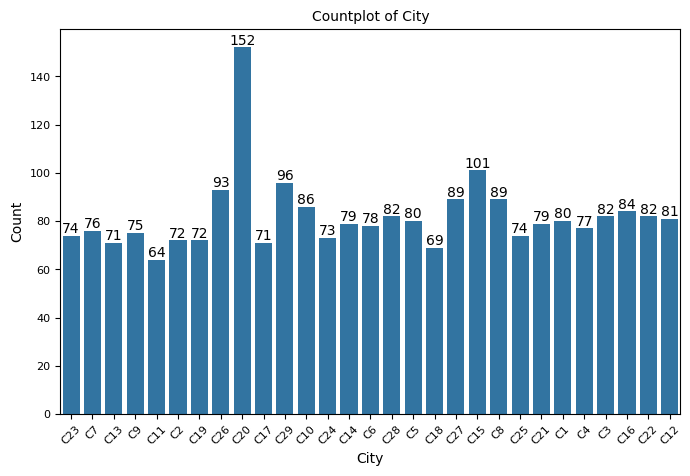

In [ ]:
# Plotting Count plot for categorical features

for feature in df_drivers.columns:
  # Skipping numeric features for plotting count plot
  if df_drivers[feature].dtype != 'object':
    continue

  # Count plot
  plt.figure(figsize=(8, 5))

  ax = sns.countplot(data = df_drivers, x = df_drivers[feature])
  for label in ax.containers:
    ax.bar_label(label)

  # Add title and labels
  plt.title(f'Countplot of {feature}',fontsize = 10)
  plt.xlabel(feature)
  plt.xticks(fontsize = 8, rotation = 45)
  plt.ylabel('Count')
  plt.yticks(fontsize = 8)

  # Show the plot
  plt.show()

**Comments:**
Most drivers (152) are from City C20, followed by (101) from C15, (96) from C29, (93) from C26

In [ ]:
# Plotting Histogram for Continuous Variables
# df_drivers.hist(figsize = (20,20))
# plt.show()

In [ ]:
# Plotting Histogram for Continuous Variables
import numpy as np
import matplotlib.pyplot as plt

def histplot(df):
  for feature in df.columns:
    # Skipping non-numeric features for histogram plotting
    if df[feature].dtype == 'object':
        continue

    # Calculate mean, median, and mode
    mean = df[feature].mean()  # Fill in the blank to calculate mean
    median = df[feature].median()  # Fill in the blank to calculate median
    mode = df[feature].mode().get(0, np.nan)  # Fill in the blank to calculate mode

    # Create the histogram
    plt.figure(figsize=(10, 6))
    df[feature].hist(bins=20, alpha=0.7)

    # Add lines for mean, median, and mode
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)  # Fill in the blank to plot mean
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2)  # Fill in the blank to plot median
    plt.axvline(mode, color='blue', linestyle='dashed', linewidth=2)  # Fill in the blank to plot mode

    # Add annotations for mean, median, and mode
    plt.text(mean, plt.ylim()[1] * 0.95, f'Mean: {mean:.2f}', color = 'red')  # Fill in the blank to annotate mean
    plt.text(median, plt.ylim()[1] * 0.90, f'Median: {median:.2f}', color = 'green')  # Fill in the blank to annotate median
    plt.text(mode, plt.ylim()[1] * 0.85, f'Mode: {mode:.2f}', color = 'blue')  # Fill in the blank to annotate mode

    # Add title and labels
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()


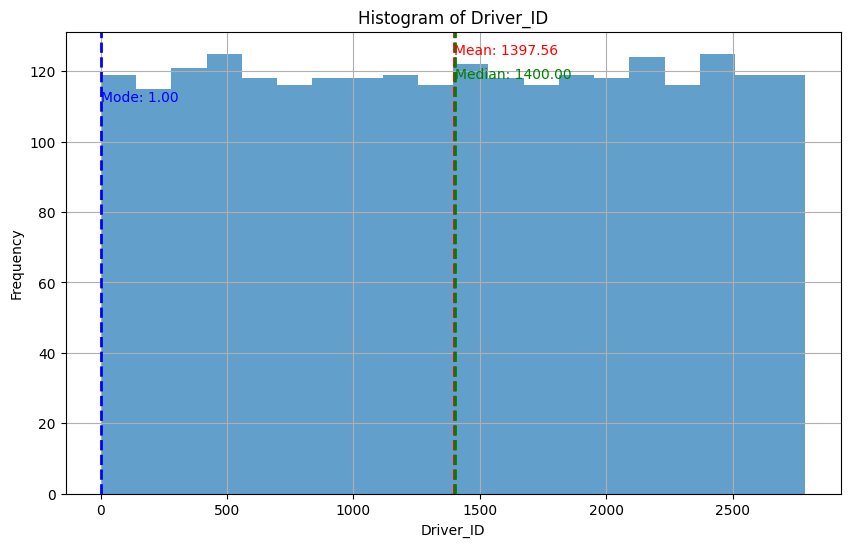

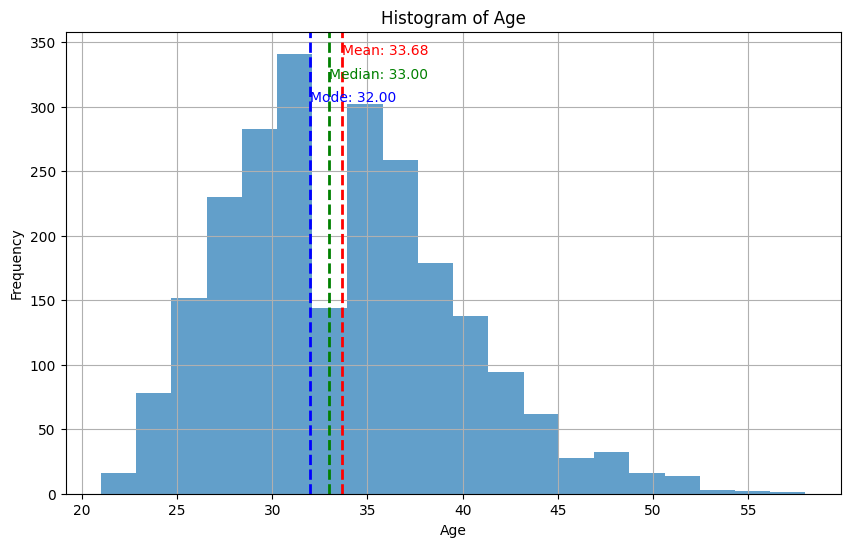

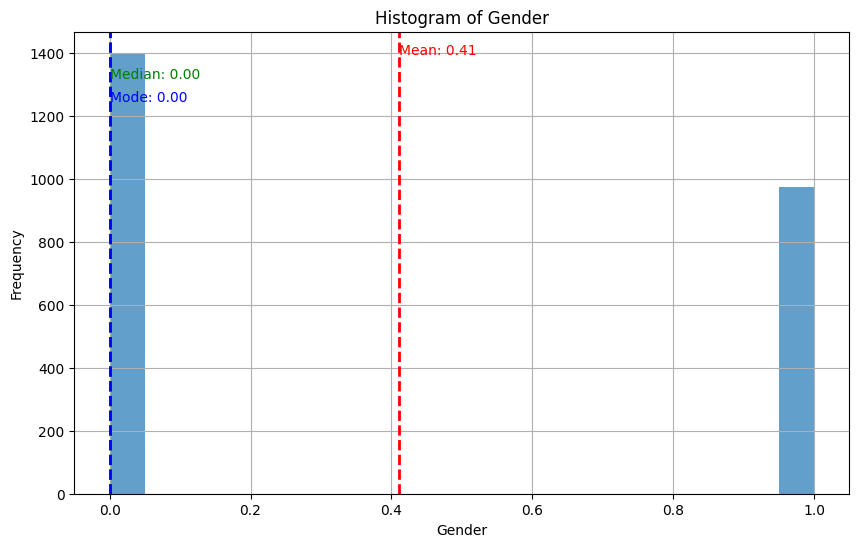

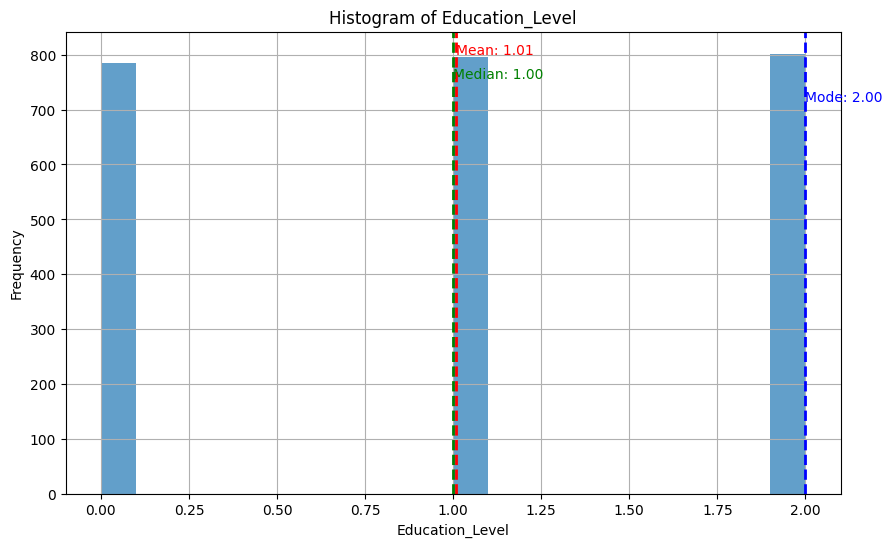

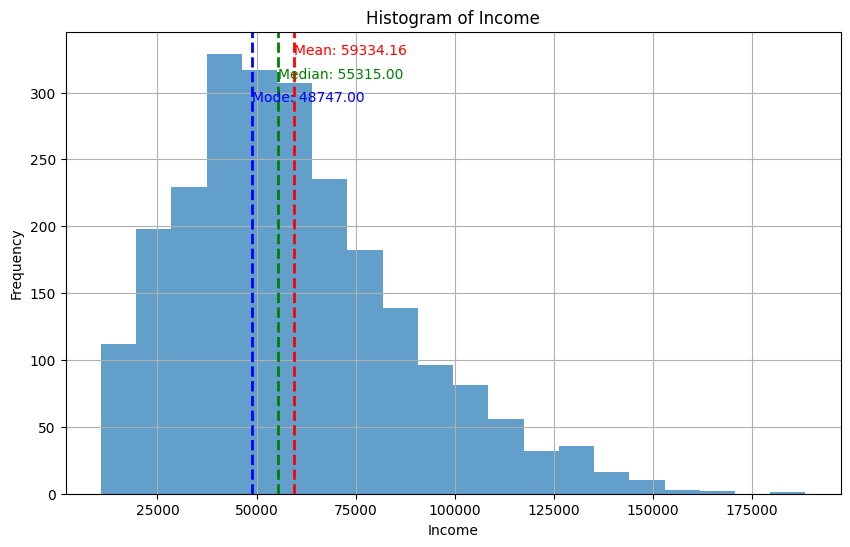

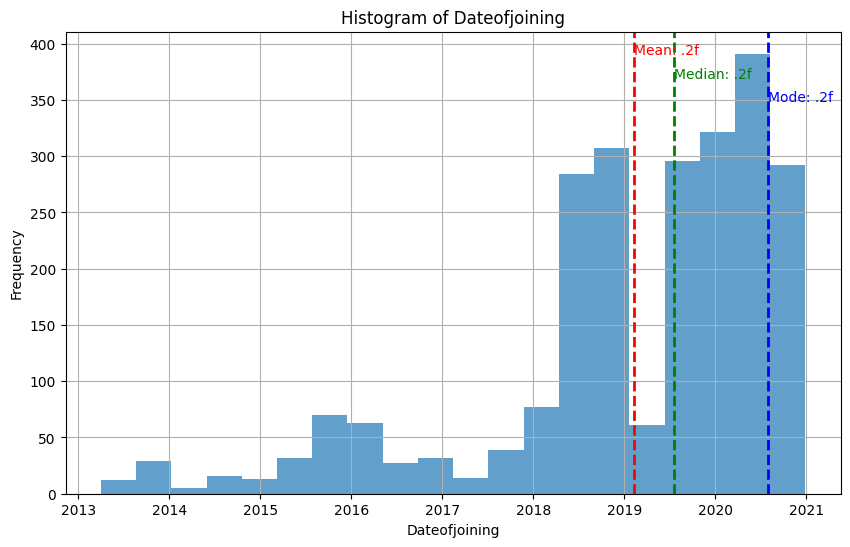

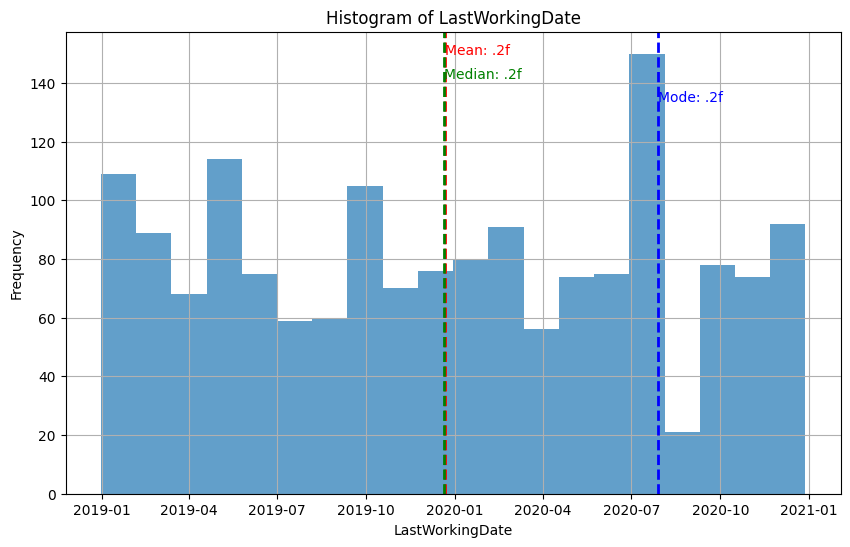

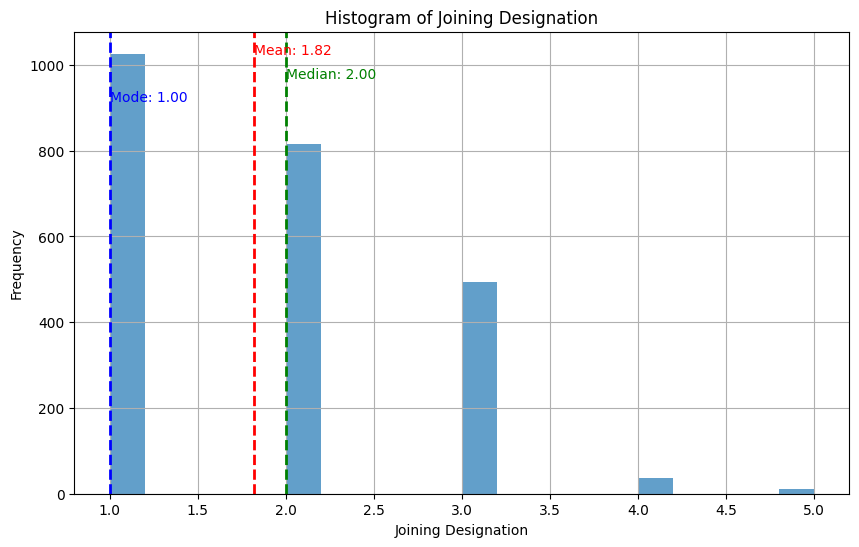

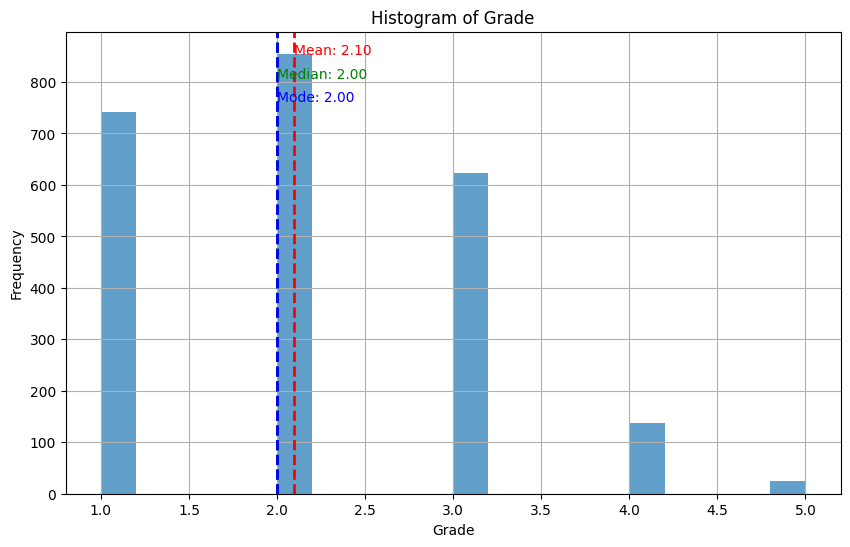

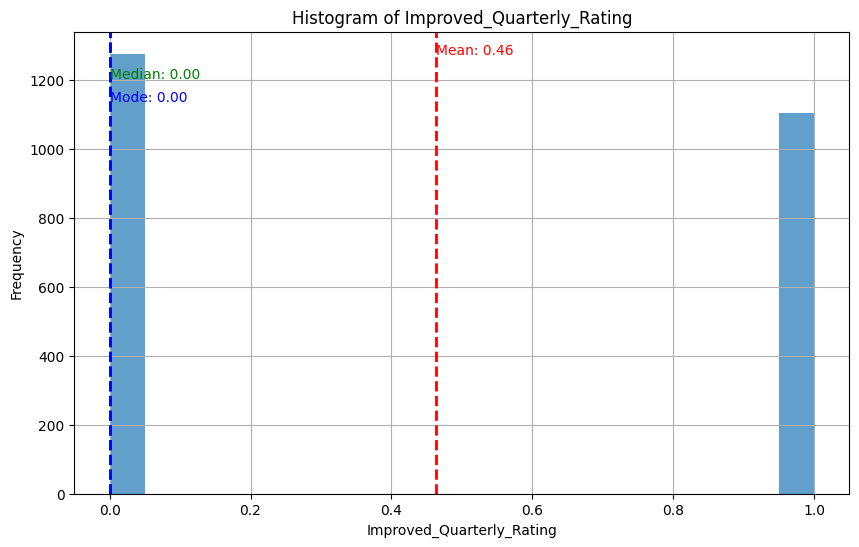

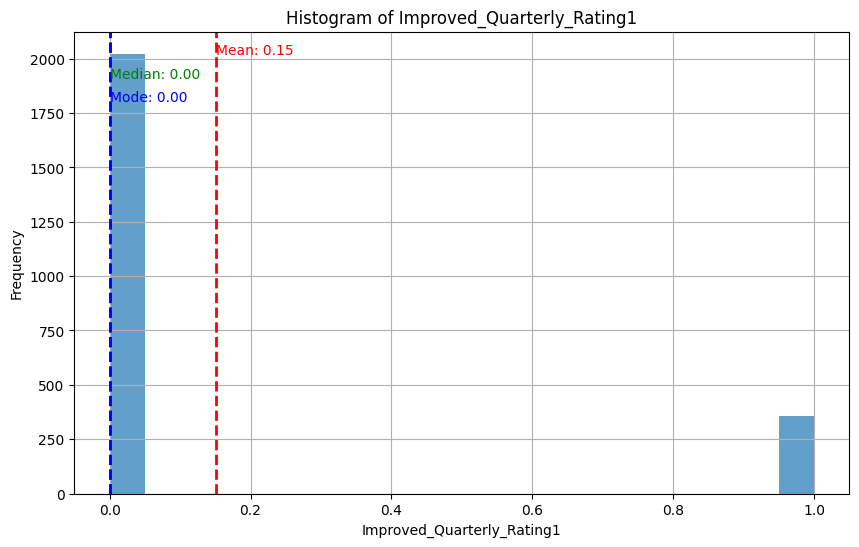

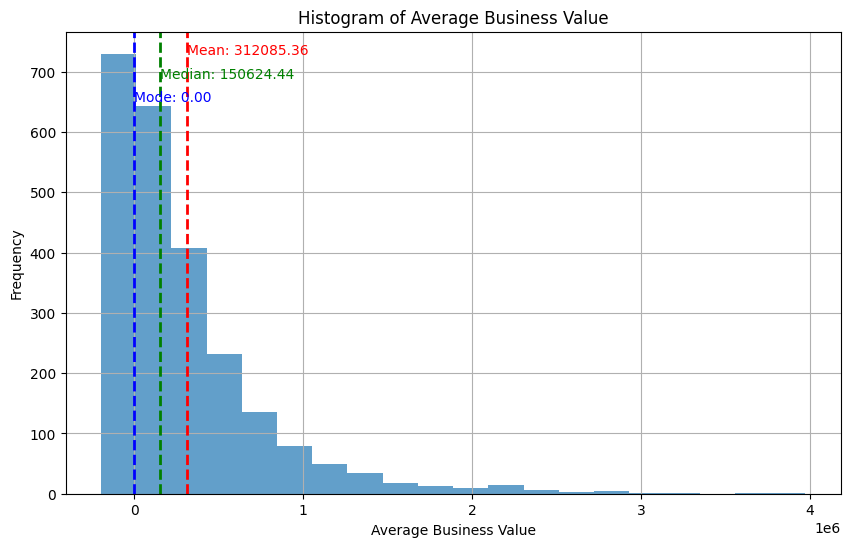

In [ ]:
histplot(df_drivers)

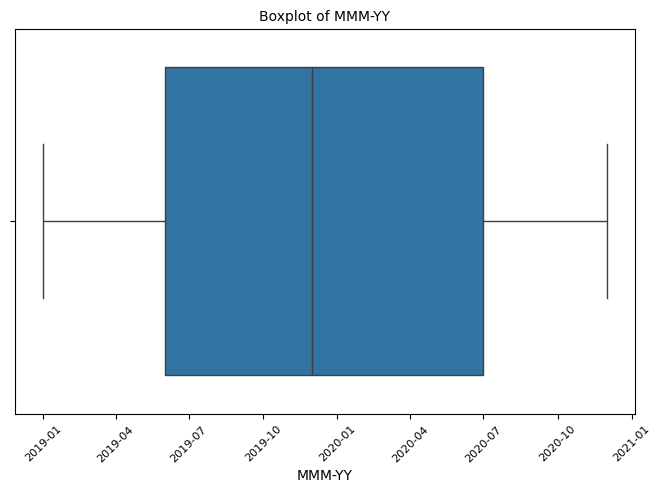

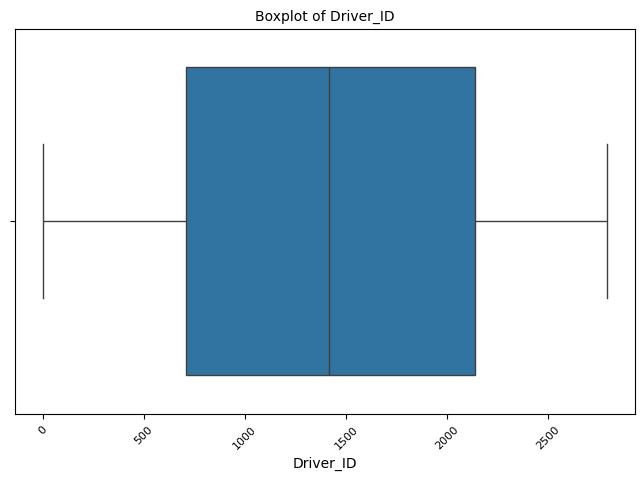

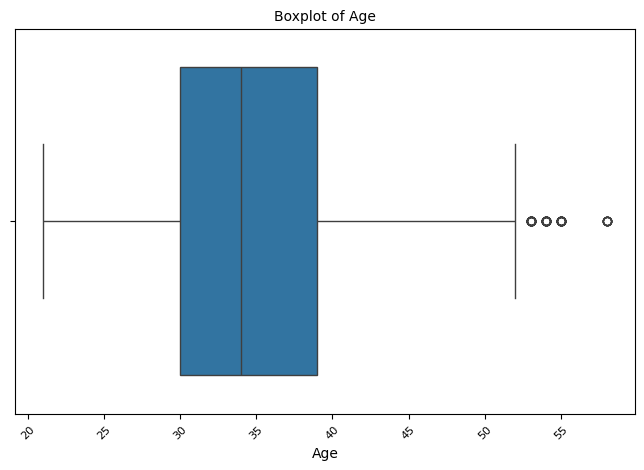

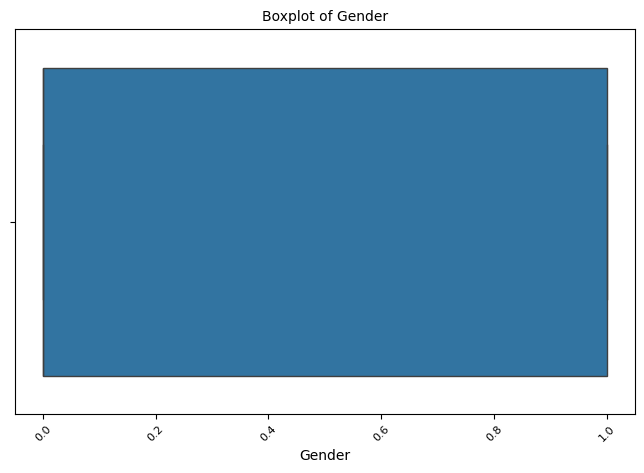

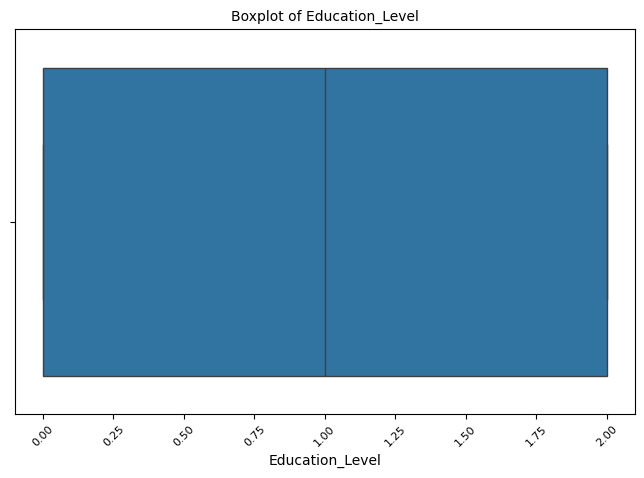

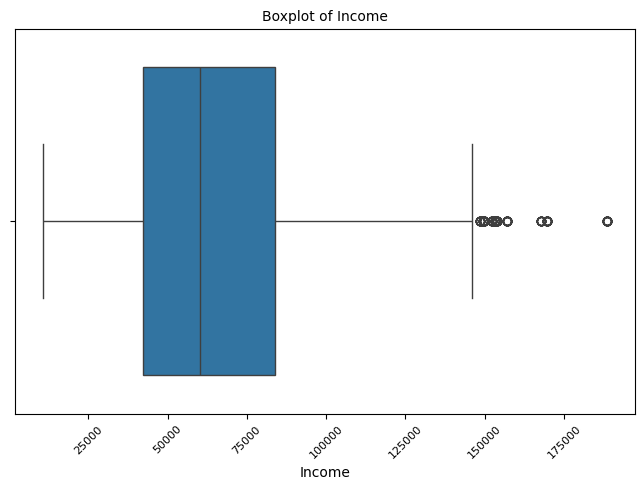

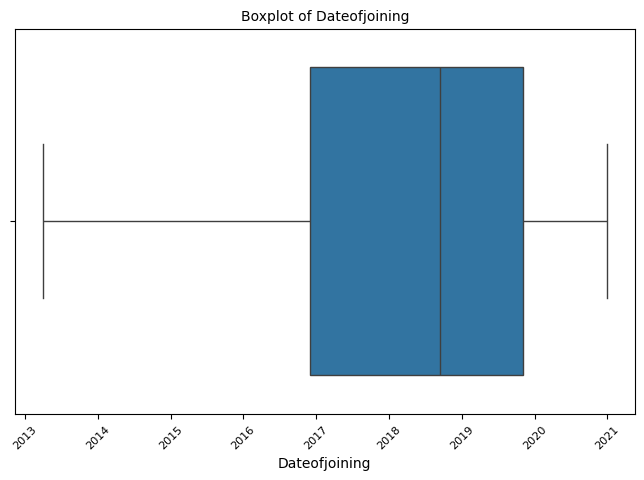

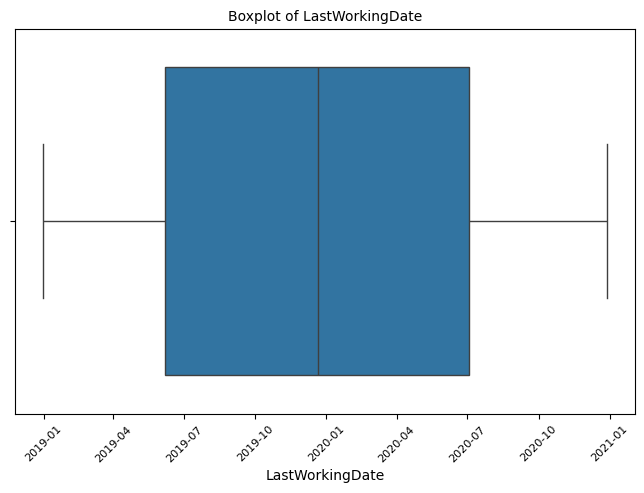

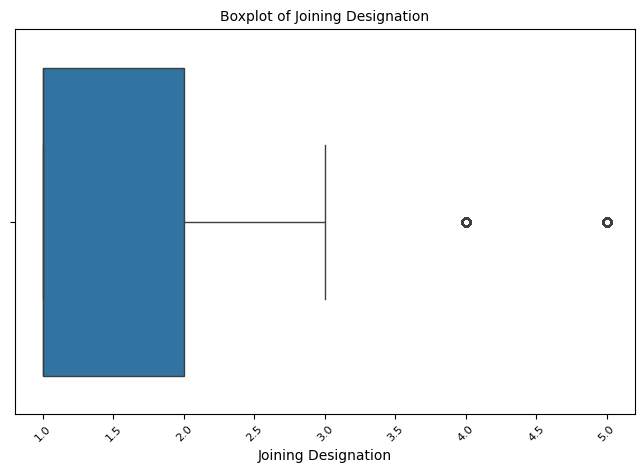

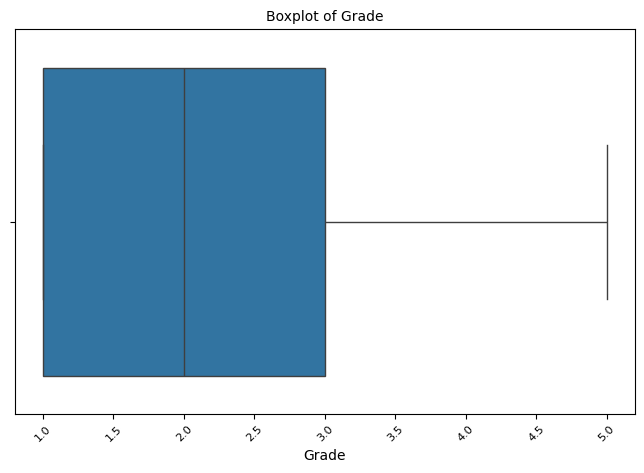

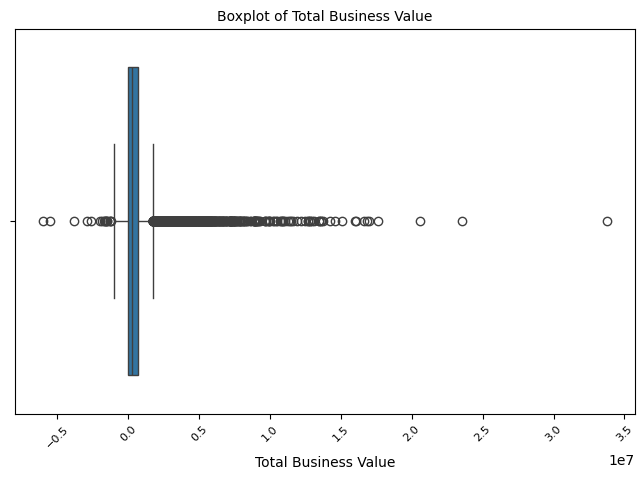

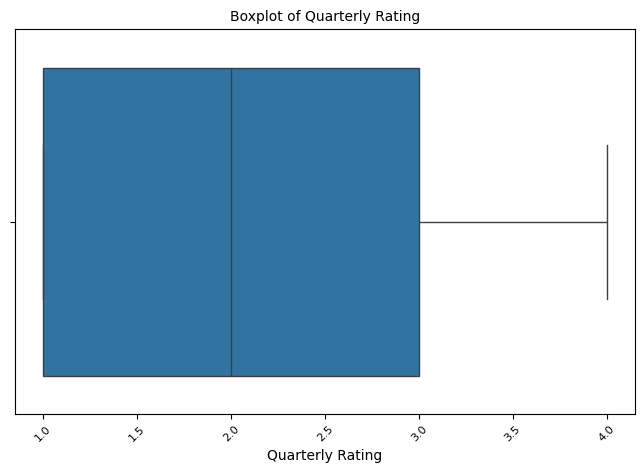

In [ ]:
# BoxPlot to detect Outliers


for feature in df.columns:
  # Skipping numeric features for plotting count plot
  if df[feature].dtype == 'object':
    continue

  # Count plot
  plt.figure(figsize=(8, 5))

  ax = sns.boxplot(data = df, x = df[feature])

  # Add title and labels
  plt.title(f'Boxplot of {feature}',fontsize = 10)
  plt.xlabel(feature)
  plt.xticks(fontsize = 8, rotation = 45)
  #plt.ylabel('Count')
  plt.yticks(fontsize = 8)

  # Show the plot
  plt.show()


**Comment:**
- Age distribution is slightly right skewed, with most drivers around the age of 32-33. (almost normal distribution)
- Income distribution is right skewed with mean of 59,334.16 and m3edian of 55,315.00
- Average Business Value distribution is right skewed with mean 312085.36 and median 1506224.44
- 1400 Made drivers, and abut 950 female drivers
- Equal number of drivers with different types of education level
- Most drivers have joined in 2020
---------------------------------------------------------------
**Analysis done after model runs:**
- Age has a few outliers but that can be ignored as Age is not a major contributer to Attrition.
- Joining Designation has very few outliers - ones with Joining Designation as 4 and 5 but it can be ignored since this is also not a prominent feature.
- Income has few and Total Business Value has many outliers - however since we have limited data, deleting rows would impact the analysis hence they are being left out.


## ***Bivariate / Multi-variate Analysis***

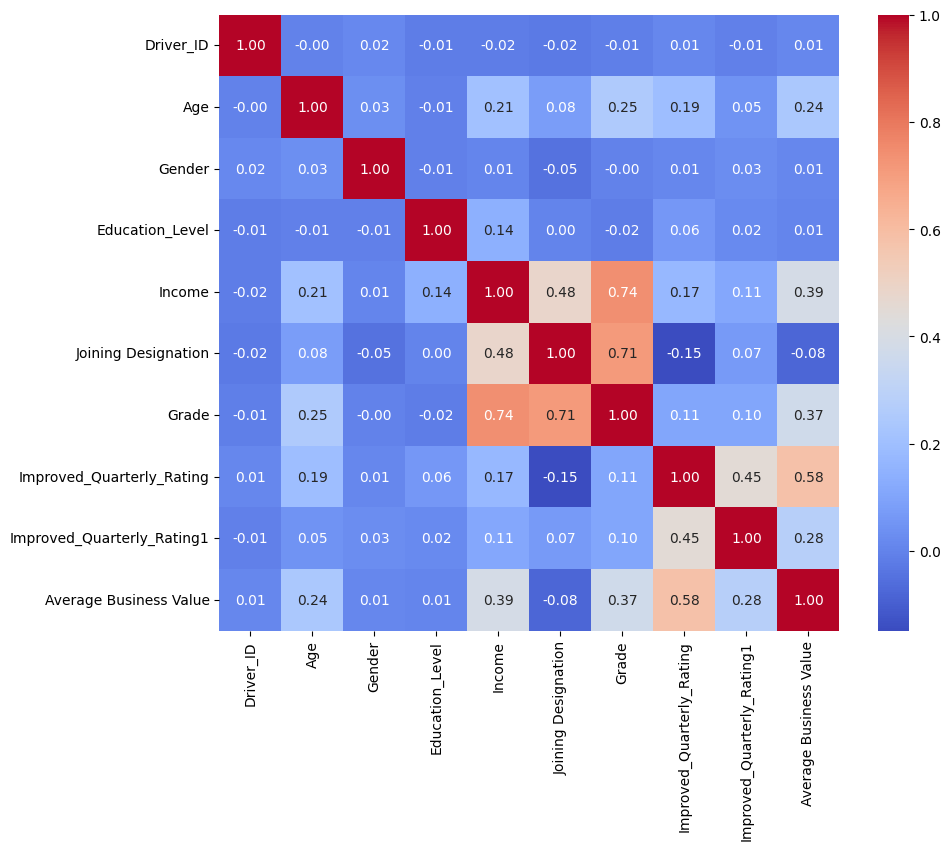

In [ ]:
# Using heatmap to identify correlation between numerical data

import seaborn as sns

# Compute the correlation matrix for numerical features
correlation_matrix = df_drivers.select_dtypes(include=[np.number]).corr()  # Fill in the blank to compute correlation

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # Fill in the blank to plot the heatmap

# Show the plot
plt.show()

**Comments:**
- Grade,Income and Grade,Joining Designation have positive correlation
- Average Business Value, Improved Quarterly Rating have positive correlation
- Joining Designation,Income and Imprived Quaterly Rating, Rating 1 have positive correlation closer to 0
- Improved Quarterly Rating,Joining Designation have close to 0 but negative correlation.


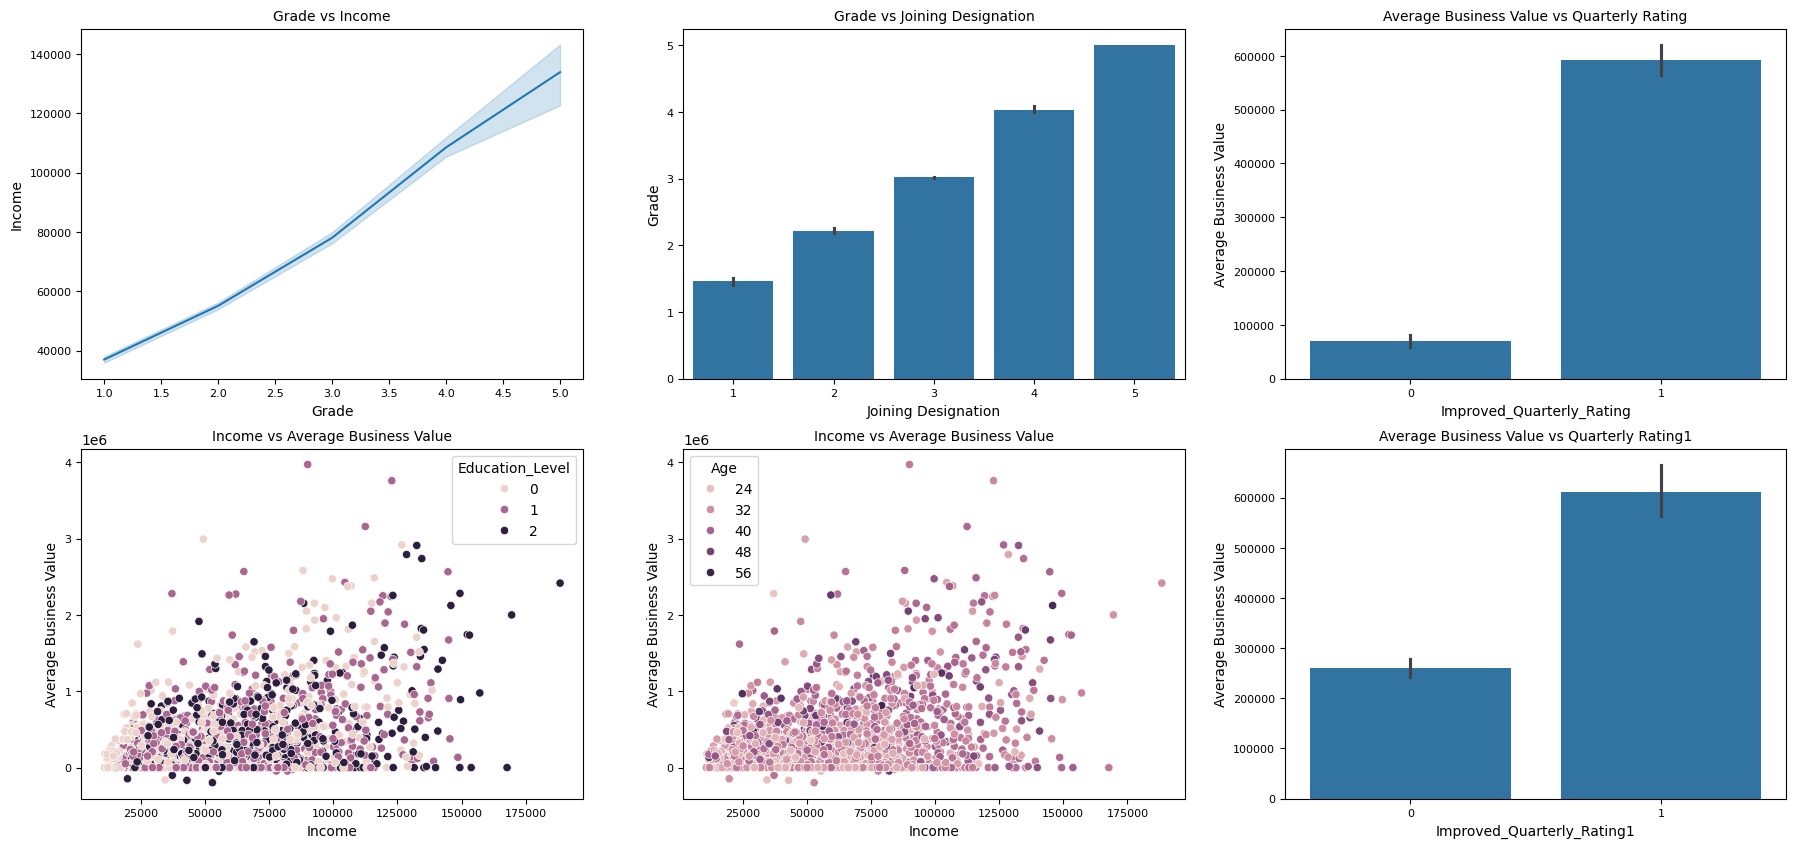

In [ ]:
# Potting to multiple features to understand their correlation
plt.figure(figsize = (22,10))

plt.subplot(2,3,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Grade vs Income",fontsize = 10)
sns.lineplot(data = df_drivers, x = 'Grade', y = 'Income')

plt.subplot(2,3,2)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Grade vs Joining Designation",fontsize = 10)
sns.barplot(data = df_drivers, x = 'Joining Designation', y = 'Grade')

plt.subplot(2,3,3)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Average Business Value vs Quarterly Rating",fontsize = 10)
sns.barplot(data = df_drivers, x = 'Improved_Quarterly_Rating', y = 'Average Business Value')

plt.subplot(2,3,4)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Income vs Average Business Value",fontsize = 10)
sns.scatterplot(data = df_drivers, x = 'Income', y = 'Average Business Value', hue = 'Education_Level')

plt.subplot(2,3,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Income vs Average Business Value",fontsize = 10)
sns.scatterplot(data = df_drivers, x = 'Income', y = 'Average Business Value', hue = 'Age')

plt.subplot(2,3,6)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Average Business Value vs Quarterly Rating1",fontsize = 10)
sns.barplot(data = df_drivers, x = 'Improved_Quarterly_Rating1', y = 'Average Business Value')

plt.show()

In [ ]:

#plt.bar(df_drivers, x = 'Grade', y = '', color='r')
#plt.bar(df_drivers, x = '', y = '', color='r')
#plt.show()

**Comments:**
- Income and Grade are positively correlated
- Higher the joining designation, higher the grade
- Average business value by drivers with Improved_Quarterly_Rating and rating1 is high
- Higher the Income, higher business value created by drivers.
- Higher average business value is created by drivers with education level 1
- More the age and income higher average business value created by drivers.

>* ***More age, high Income > Higher Business Value***

# ***2. Data Pre-processing***

**2. Data Preprocessing (50 Points)**

- Duplicate value check
- Missing value treatment (Gender, Age) - KNN Imputation
- Feature Engineering
>- **Feature1:** Target variable is not present hence new feature can be created based on LWD. If LWD is NULL, driver is a part of RideSharingCo otherwise driver has left RideSharingCo.
>- **Feature2:** New feature can be created to identify the tenure of a driver at RideSharingCo.
>> - In LWD, replace NULL with 31-12-2020 (assuming the date of analy
>> - Subtract LWD - Dateofjoining
- Check Class Imbalance
- Encoding

## ***Duplicate Value Check***

In [ ]:
df.duplicated().value_counts()

False    19104
Name: count, dtype: int64

In [ ]:
df_drivers.duplicated().value_counts()

False    2381
Name: count, dtype: int64

## ***Missing Value Treatment***

Features: Gender, Age

In [ ]:
# Identify columns with missing values
df_drivers.isnull().sum()

Driver_ID                       0
Age                             7
Gender                         10
City                            0
Education_Level                 0
Income                          0
Dateofjoining                   0
LastWorkingDate               765
Joining Designation             0
Grade                           0
Improved_Quarterly_Rating       0
Improved_Quarterly_Rating1      0
Average Business Value          0
dtype: int64

In [ ]:
# Formulating a pipeline for pre-processing to impute missing values using KNNIMputer

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline
pipeline = Pipeline([
    #('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('imputer', KNNImputer(n_neighbors=5))  # Step 2: KNNImputer for missing value imputation (taking K as 5)
])

# Fit and transform the data using the pipeline
X_transformed = pipeline.fit_transform(df_drivers[['Gender','Age']])

# Creating dataframe
X_transformed = pd.DataFrame(X_transformed,columns=df_drivers[['Gender','Age']].columns)

X_transformed.isna().sum() #Columns without missing values

Gender    0
Age       0
dtype: int64

In [ ]:
# Saving imputed values in the original dataframe
df_drivers['Gender'] = X_transformed['Gender']
df_drivers['Age'] = X_transformed['Age']

In [ ]:
# Identify columns with missing values
df_drivers.isnull().sum()

Driver_ID                       0
Age                             0
Gender                          0
City                            0
Education_Level                 0
Income                          0
Dateofjoining                   0
LastWorkingDate               765
Joining Designation             0
Grade                           0
Improved_Quarterly_Rating       0
Improved_Quarterly_Rating1      0
Average Business Value          0
dtype: int64

## ***Outlier Treatment***

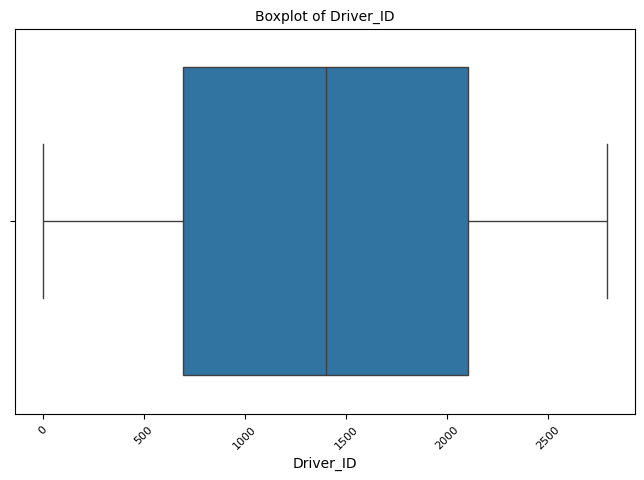

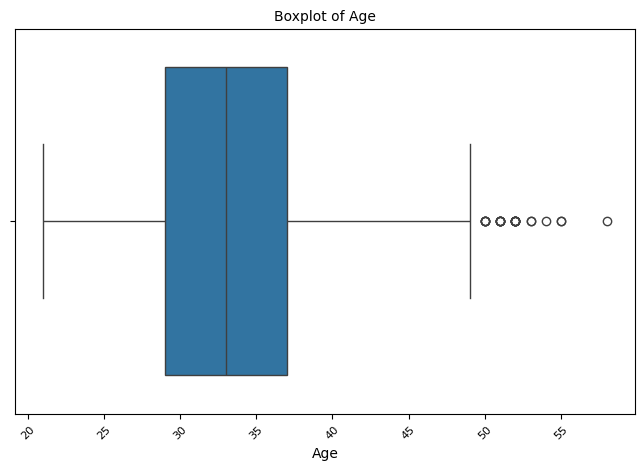

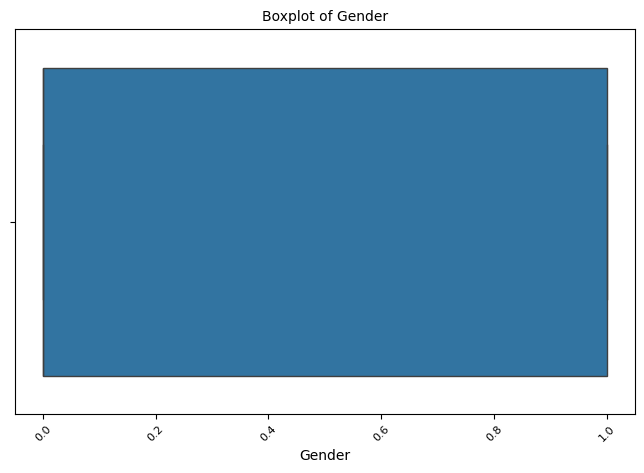

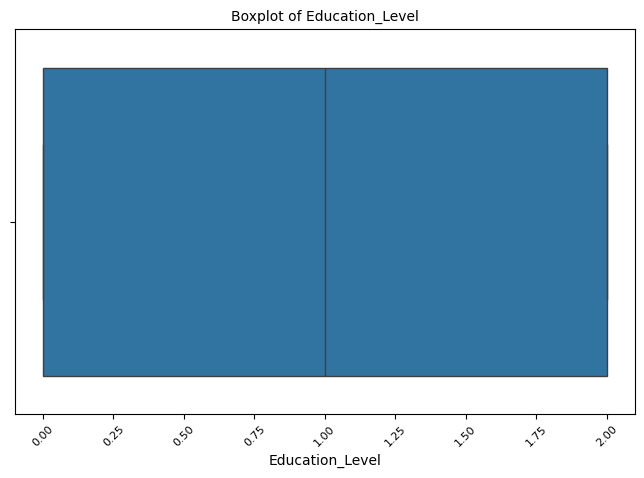

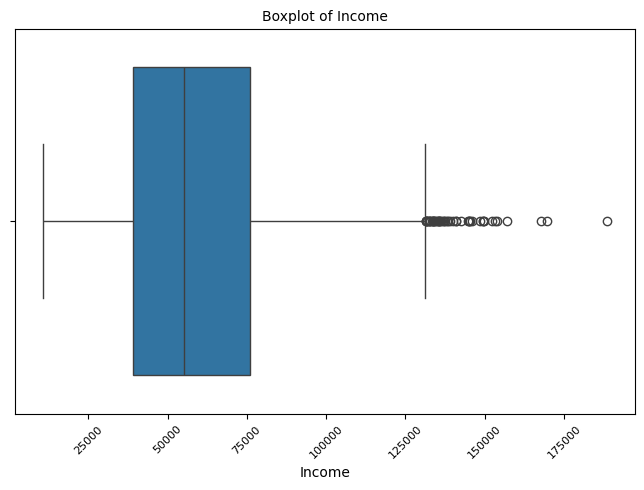

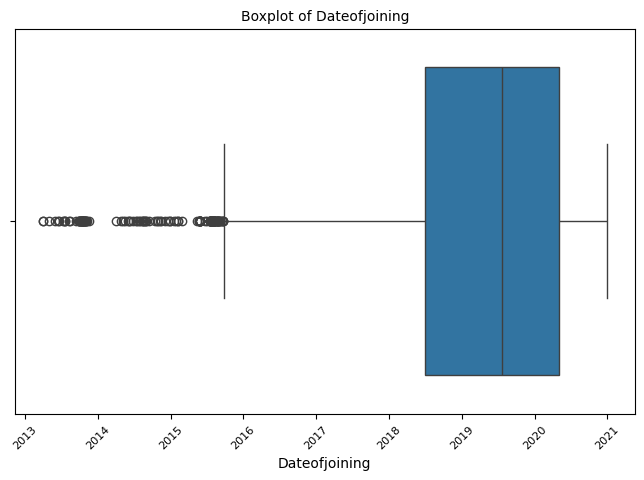

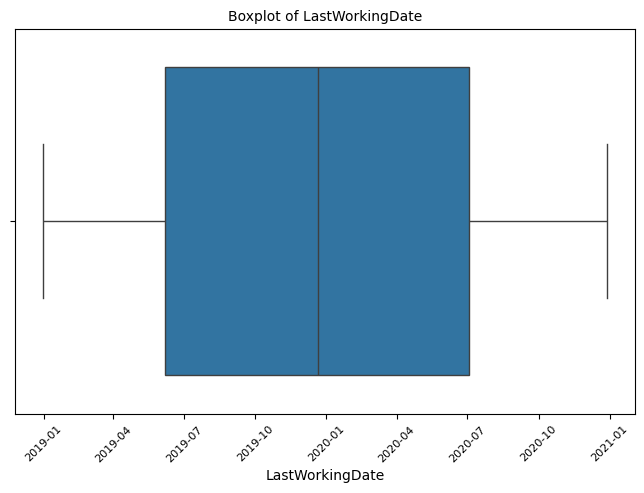

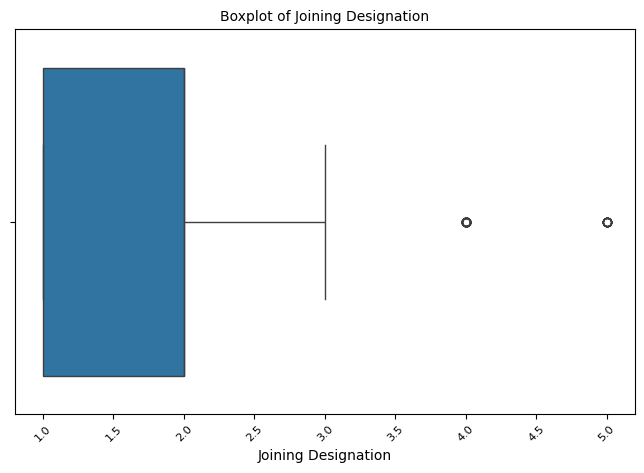

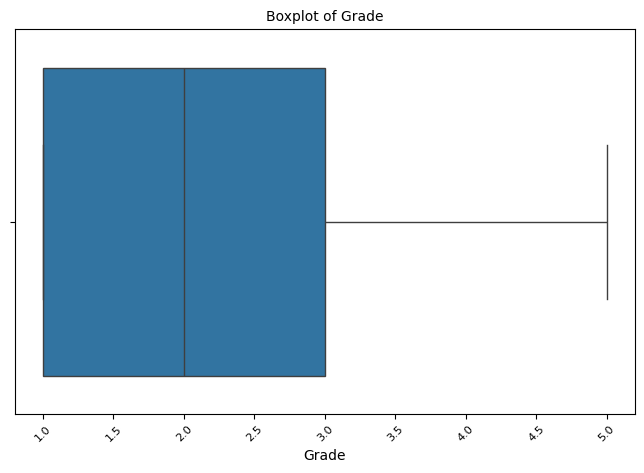

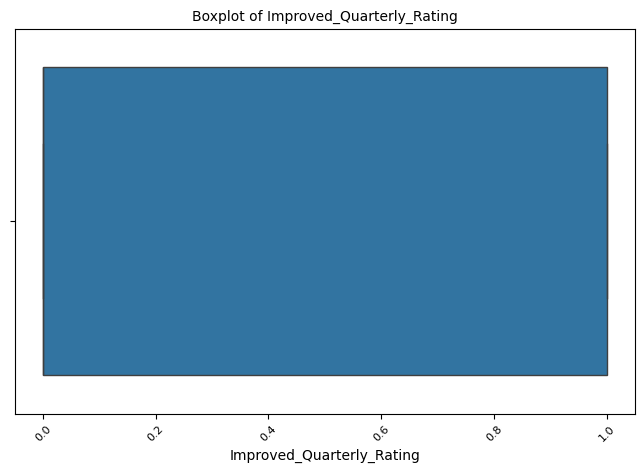

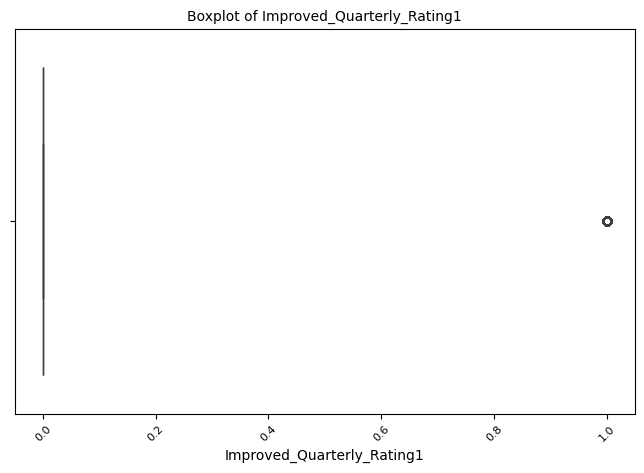

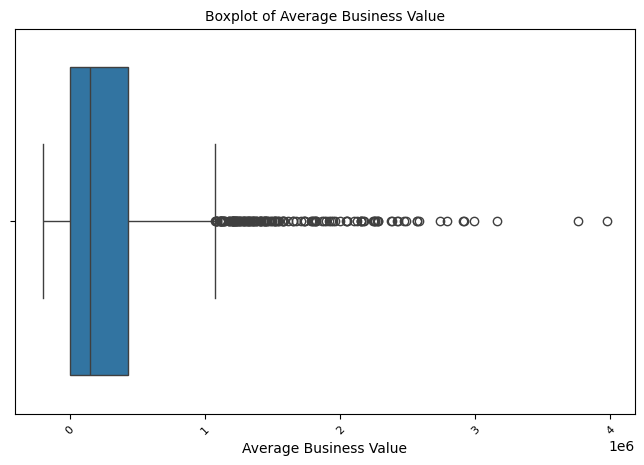

In [ ]:
# BoxPlot to detect Outliers

for feature in df_drivers.columns:
  # Skipping numeric features for plotting count plot
  if df_drivers[feature].dtype == 'object':
    continue

  # Count plot
  plt.figure(figsize=(8, 5))

  ax = sns.boxplot(data = df_drivers, x = df_drivers[feature])

  # Add title and labels
  plt.title(f'Boxplot of {feature}',fontsize = 10)
  plt.xlabel(feature)
  plt.xticks(fontsize = 8, rotation = 45)
  #plt.ylabel('Count')
  plt.yticks(fontsize = 8)

  # Show the plot
  plt.show()


In [ ]:
def detect_outliers(df):
  for feature in df.columns:
    # Min Max value
    print(f" Min, Max for {feature} : {df[feature].min(), df[feature].max()}")

    # Percentile
    v_25 = df[feature].quantile(q = 0.25) # 25th percentile
    v_75 = df[feature].quantile(q = 0.75) # 75th percentile
    v_50 = df[feature].quantile(q = 0.50) # 50th percentile

    # IQR Calculation
    IQR = v_75 - v_25
    th_min = round(v_25 - 1.5*IQR,4)
    th_max = round(v_75 + 1.5*IQR,4)
    print(f" Min Threshold, Maximum Threshold for {feature} : {th_min, th_max}")
    if (df[feature].min() >= th_min) & (df[feature].max() <= th_max):
      print("Outliers are NOT present!!")
    else:
      print("Outliers are present!!")
    print("*************************************************************************")


In [ ]:
detect_outliers(df_drivers[['Age','Income','Average Business Value']])

 Min, Max for Age : (21.0, 58.0)
 Min Threshold, Maximum Threshold for Age : (17.0, 49.0)
Outliers are present!!
*************************************************************************
 Min, Max for Income : (10747, 188418)
 Min Threshold, Maximum Threshold for Income : (-16219.0, 131309.0)
Outliers are present!!
*************************************************************************
 Min, Max for Average Business Value : (-197932.85714285713, 3972127.5)
 Min Threshold, Maximum Threshold for Average Business Value : (-644248.125, 1073746.875)
Outliers are present!!
*************************************************************************


In [ ]:
# Number of values outside threshold
df_drivers[df_drivers['Age'] > 49]['Age'].value_counts()

Age
52.0    8
51.0    6
50.0    5
53.0    2
55.0    2
54.0    1
58.0    1
Name: count, dtype: int64

In [ ]:
# Number of values outside threshold
df_drivers[df_drivers['Income'] > 131309.0]['Income'].shape[0]

48

In [ ]:
# Number of values outside threshold
df_drivers[df_drivers['Average Business Value'] > 1073746.875]['Average Business Value'].shape[0]

148

In [ ]:
df_drivers.shape

(2381, 13)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers(df, feature):

    # Shape before outlier Removal
    print("Shape before outlier Removal: ", df[feature].shape[0])

    # Percentile
    v_25 = df[feature].quantile(q = 0.25) # 25th percentile
    v_75 = df[feature].quantile(q = 0.75) # 75th percentile
    v_50 = df[feature].quantile(q = 0.50) # 50th percentile

    # IQR Calculation
    IQR = v_75 - v_25
    th_min = round(v_25 - 1.5*IQR,4)
    th_max = round(v_75 + 1.5*IQR,4)

    # Box plot with outliers
    sns.boxplot(df[feature])
    plt.title(f'Original Box Plot of {feature}')
    plt.show()

    # Removing Outliers
    removed_outliers = df[df[feature] <= th_max]

    # Shape after outlier Removal
    print("Shape after outlier Removal: ", removed_outliers[feature].shape[0])

    # Box plot after outliers removal
    sns.boxplot(removed_outliers[feature])
    plt.title(f'Box Plot without Outliers of {feature}')
    plt.show()
    return removed_outliers

In [ ]:
#df_drivers = remove_outliers(df_drivers, 'Income')

In [ ]:
#df_drivers = remove_outliers(df_drivers, 'Average Business Value')

In [ ]:
df_drivers.shape

(2381, 13)

**Comments:**

- Age has a few outliers but that can be ignored as Age is not a major contributer to Attrition.
- Joining Designation has very few outliers - ones with Joining Designation as 4 and 5 but it can be ignored since this is also not a prominent feature.
- After removal of Outliers for Income and Total Business Value, models were showing worse performance hence values have been left out.
- Outliers for Tenure is left as we have limited data hence removing more data would reduce our training set.

## ***Feature Engineering***

>- **Feature1:** Target variable is not present hence new feature can be created based on LWD. If LWD is NULL, driver is a part of RideSharingCo otherwise driver has left RideSharingCo.
>- **Feature2:** New feature can be created to identify the tenure of a driver at RideSharingCo.
>> - In LWD, replace NULL with 31-12-2020 (assuming the date of analy
>> - Subtract LWD - Dateofjoining

In [ ]:
df_drivers.head(2)

Driver_ID   Age  Gender City  Education_Level  Income Dateofjoining  \
0          1  28.0     0.0  C23                2   57387    2018-12-24   
1          2  31.0     0.0   C7                2   67016    2020-11-06   

  LastWorkingDate  Joining Designation  Grade  Improved_Quarterly_Rating  \
0      2019-03-11                    1      1                          0   
1             NaT                    2      2                          0   

   Improved_Quarterly_Rating1  Average Business Value  
0                           0                571860.0  
1                           0                     0.0

In [ ]:
# Create a new feature for Attrition.
# 1: Driver left RideSharingCo (LastWorkingDate present)
# 0: Driver is still with RideSharingCo (LastWorkingDate is NULL)

df_drivers['Attrition'] = np.where(df_drivers['LastWorkingDate'].isnull(), 0, 1)
df_drivers.head(2)

Driver_ID   Age  Gender City  Education_Level  Income Dateofjoining  \
0          1  28.0     0.0  C23                2   57387    2018-12-24   
1          2  31.0     0.0   C7                2   67016    2020-11-06   

  LastWorkingDate  Joining Designation  Grade  Improved_Quarterly_Rating  \
0      2019-03-11                    1      1                          0   
1             NaT                    2      2                          0   

   Improved_Quarterly_Rating1  Average Business Value  Attrition  
0                           0                571860.0          1  
1                           0                     0.0          0

In [ ]:
# Replacing NULL value in LastWorkingDate as 31st Dec 2020, assuming this is the current date (Max Last working date in original data is 2020-12-28)

df_drivers['LastWorkingDate'].fillna('2020-12-31', inplace = True)
df_drivers.head(2)

Driver_ID   Age  Gender City  Education_Level  Income Dateofjoining  \
0          1  28.0     0.0  C23                2   57387    2018-12-24   
1          2  31.0     0.0   C7                2   67016    2020-11-06   

  LastWorkingDate  Joining Designation  Grade  Improved_Quarterly_Rating  \
0      2019-03-11                    1      1                          0   
1      2020-12-31                    2      2                          0   

   Improved_Quarterly_Rating1  Average Business Value  Attrition  
0                           0                571860.0          1  
1                           0                     0.0          0

In [ ]:
# Checking if LWD column is still of type datetime
df_drivers['LastWorkingDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2381 entries, 0 to 2380
Series name: LastWorkingDate
Non-Null Count  Dtype         
--------------  -----         
2381 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.7 KB


In [ ]:
# Creating a new feature 'Tenure' of the driver in RideSharingCo
df_drivers['Tenure'] = df_drivers['LastWorkingDate'] - df_drivers['Dateofjoining']
df_drivers.head(2)

Driver_ID   Age  Gender City  Education_Level  Income Dateofjoining  \
0          1  28.0     0.0  C23                2   57387    2018-12-24   
1          2  31.0     0.0   C7                2   67016    2020-11-06   

  LastWorkingDate  Joining Designation  Grade  Improved_Quarterly_Rating  \
0      2019-03-11                    1      1                          0   
1      2020-12-31                    2      2                          0   

   Improved_Quarterly_Rating1  Average Business Value  Attrition  Tenure  
0                           0                571860.0          1 77 days  
1                           0                     0.0          0 55 days

In [ ]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Driver_ID                   2381 non-null   int64          
 1   Age                         2381 non-null   float64        
 2   Gender                      2381 non-null   float64        
 3   City                        2381 non-null   object         
 4   Education_Level             2381 non-null   int64          
 5   Income                      2381 non-null   int64          
 6   Dateofjoining               2381 non-null   datetime64[ns] 
 7   LastWorkingDate             2381 non-null   datetime64[ns] 
 8   Joining Designation         2381 non-null   int64          
 9   Grade                       2381 non-null   int64          
 10  Improved_Quarterly_Rating   2381 non-null   int64          
 11  Improved_Quarterly_Rating1  2381 non-null  

## ***Check Class Imbalance***

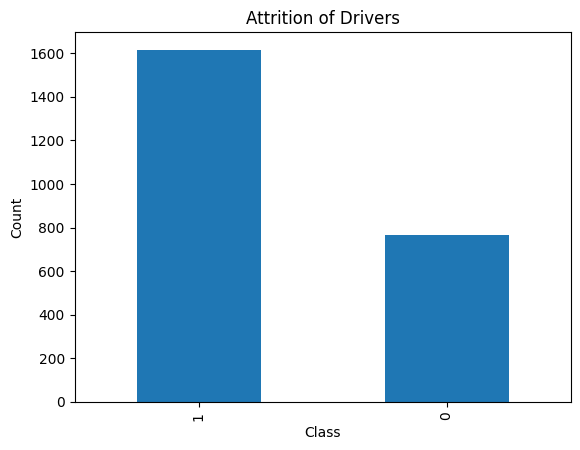

In [ ]:
# Plot count of data across classes
df_drivers['Attrition'].value_counts().plot(kind = 'bar')
plt.title("Attrition of Drivers")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Since Tree family algorithm will be used, converting relevant features into categorical for analysis accordingly

## ***Correcting Feature formatting - For tree based algorithms***

In [ ]:
df_drivers.head(2)

Driver_ID   Age  Gender City  Education_Level  Income Dateofjoining  \
0          1  28.0     0.0  C23                2   57387    2018-12-24   
1          2  31.0     0.0   C7                2   67016    2020-11-06   

  LastWorkingDate  Joining Designation  Grade  Improved_Quarterly_Rating  \
0      2019-03-11                    1      1                          0   
1      2020-12-31                    2      2                          0   

   Improved_Quarterly_Rating1  Average Business Value  Attrition  Tenure  
0                           0                571860.0          1 77 days  
1                           0                     0.0          0 55 days

In [ ]:
# Convert columns from float64 to int64 (To be done after Missing values Treatment)
df_drivers['Gender'] = df_drivers['Gender'].astype('int64')
df_drivers['Age'] = df_drivers['Age'].astype('int64')

df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Driver_ID                   2381 non-null   int64          
 1   Age                         2381 non-null   int64          
 2   Gender                      2381 non-null   int64          
 3   City                        2381 non-null   object         
 4   Education_Level             2381 non-null   int64          
 5   Income                      2381 non-null   int64          
 6   Dateofjoining               2381 non-null   datetime64[ns] 
 7   LastWorkingDate             2381 non-null   datetime64[ns] 
 8   Joining Designation         2381 non-null   int64          
 9   Grade                       2381 non-null   int64          
 10  Improved_Quarterly_Rating   2381 non-null   int64          
 11  Improved_Quarterly_Rating1  2381 non-null  

In [ ]:
# Converting Tenure from TimeDelta to days / Int
df_drivers['Tenure'] = df_drivers['Tenure'].dt.days

In [ ]:
df_drivers.head(2)

Driver_ID  Age  Gender City  Education_Level  Income Dateofjoining  \
0          1   28       0  C23                2   57387    2018-12-24   
1          2   31       0   C7                2   67016    2020-11-06   

  LastWorkingDate  Joining Designation  Grade  Improved_Quarterly_Rating  \
0      2019-03-11                    1      1                          0   
1      2020-12-31                    2      2                          0   

   Improved_Quarterly_Rating1  Average Business Value  Attrition  Tenure  
0                           0                571860.0          1      77  
1                           0                     0.0          0      55

In [ ]:
# Creating a deep copy of df_drivers before making changes for it to be used in a tree based algorithm
df_drivers1 = df_drivers.copy()

In [ ]:
df_drivers.nunique()

Driver_ID                     2381
Age                             36
Gender                           2
City                            29
Education_Level                  3
Income                        2339
Dateofjoining                  869
LastWorkingDate                494
Joining Designation              5
Grade                            5
Improved_Quarterly_Rating        2
Improved_Quarterly_Rating1       2
Average Business Value        1639
Attrition                        2
Tenure                         883
dtype: int64

In [ ]:
#Detect outliers in Tenure
detect_outliers(df_drivers[['Tenure']])

 Min, Max for Tenure : (0, 2831)
 Min Threshold, Maximum Threshold for Tenure : (-470.0, 1050.0)
Outliers are present!!
*************************************************************************


In [ ]:
# Number of values outside threshold
df_drivers[df_drivers['Tenure'] > 851.0]['Tenure'].shape[0]

388

**Convert to object:** Gender, Education_level, Joining Designation, Grade, Improved_Quarterly_Rating, Improved_Quarterly_Rating1, Attrition

**Remains Numerical** Driver_ID, Age, Income, Average Business Value, Tenure

In [ ]:
# Convert discrte numerical columns data type to object

df_drivers['Gender'] = df_drivers['Gender'].astype('object')
df_drivers['Education_Level'] = df_drivers['Education_Level'].astype('object')
df_drivers['Joining Designation'] = df_drivers['Joining Designation'].astype('object')
df_drivers['Grade'] = df_drivers['Grade'].astype('object')
df_drivers['Improved_Quarterly_Rating'] = df_drivers['Improved_Quarterly_Rating'].astype('object')
df_drivers['Improved_Quarterly_Rating1'] = df_drivers['Improved_Quarterly_Rating1'].astype('object')

df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   Age                         2381 non-null   int64         
 2   Gender                      2381 non-null   object        
 3   City                        2381 non-null   object        
 4   Education_Level             2381 non-null   object        
 5   Income                      2381 non-null   int64         
 6   Dateofjoining               2381 non-null   datetime64[ns]
 7   LastWorkingDate             2381 non-null   datetime64[ns]
 8   Joining Designation         2381 non-null   object        
 9   Grade                       2381 non-null   object        
 10  Improved_Quarterly_Rating   2381 non-null   object        
 11  Improved_Quarterly_Rating1  2381 non-null   object      

In [ ]:
# Function to identify unique value and counts for discrete or categorical data and min max value for continous numerical data

unique_data(df_drivers)

Unique values for  Attrition
1    1616
0     765
Name: count, dtype: int64
********************************************************
 (Min,Max) for Driver_ID: (1, 2788)
********************************************************
 (Min,Max) for Age: (21, 58)
********************************************************
 (Min,Max) for Income: (10747, 188418)
********************************************************
 (Min,Max) for Dateofjoining: (Timestamp('2013-04-01 00:00:00'), Timestamp('2020-12-28 00:00:00'))
********************************************************
 (Min,Max) for LastWorkingDate: (Timestamp('2018-12-31 00:00:00'), Timestamp('2020-12-31 00:00:00'))
********************************************************
 (Min,Max) for Average Business Value: (-197932.85714285713, 3972127.5)
********************************************************
 (Min,Max) for Tenure: (0, 2831)
********************************************************
Unique values for  Gender
0    1408
1     973
Name: count, d

(['Gender',
  'City',
  'Education_Level',
  'Joining Designation',
  'Grade',
  'Improved_Quarterly_Rating',
  'Improved_Quarterly_Rating1'],
 ['Attrition'],
 ['Driver_ID',
  'Age',
  'Income',
  'Dateofjoining',
  'LastWorkingDate',
  'Average Business Value',
  'Tenure'])

**Comment:**
- Driver_ID can be dropped before modelling (as it is a unique ID not bringing value in predicting target variable attrition
- Gender, Education_Level, Grade, Improved_Quarterly_Rating, Improved_Quarterly_Rating1, Attrition are already label encoded (with order)

- City to be Target encoded as it has no order

## ***Encoding***

1. **City** to be Target encoded as it has no order
2. **Driver_ID** can be dropped before modelling (as it is a unique ID not bringing value in predicting target variable attrition

3. **Gender, Education_Level, Grade, Improved_Quarterly_Rating, Improved_Quarterly_Rating1, Attrition** are already label encoded (with order)



In [ ]:
# Creating a deep copy before encoding
df_drivers2 = df_drivers.copy()

In [ ]:
#features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.
!pip install category_encoders
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['City']) #Insert the variable / columns to be updated
df_drivers = ce_target.fit_transform(df_drivers, df_drivers['Attrition'])  #Insert target variable

In [ ]:
df_drivers.head(2)

Driver_ID  Age Gender      City Education_Level  Income Dateofjoining  \
0          1   28      0  0.769859               2   57387    2018-12-24   
1          2   31      0  0.684190               2   67016    2020-11-06   

  LastWorkingDate Joining Designation Grade Improved_Quarterly_Rating  \
0      2019-03-11                   1     1                         0   
1      2020-12-31                   2     2                         0   

  Improved_Quarterly_Rating1  Average Business Value  Attrition  Tenure  
0                          0                571860.0          1      77  
1                          0                     0.0          0      55

In [ ]:
df_drivers['Attrition'].value_counts()

Attrition
1    1616
0     765
Name: count, dtype: int64

# ***3. Model Building***

**3. Model building (20 Points)**
- Data Splitting into Train and Test data (KFold Perform Cross Validation)
- Class Imbalance Treatment (on Training data)
- Standardization (on Training data & independent variables for Test data)
- Ensemble - Bagging Algorithm
- Ensemble - Boosting Algorithm

## ***Data Splitting***

In [ ]:
X = df_drivers.drop(['Attrition','LastWorkingDate','Dateofjoining'],axis = 1)
y = df_drivers[['Attrition']].copy()

In [ ]:
X.shape, y.shape

((2381, 12), (2381, 1))

In [ ]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number transactions on training dataset: ", X_train.shape, y_train.shape)
print("Number transactions testing dataset: ", X_test.shape, y_test.shape)

Number transactions on training dataset:  (1666, 12) (1666, 1)
Number transactions testing dataset:  (715, 12) (715, 1)


## ***Class Imbalance Treatment***

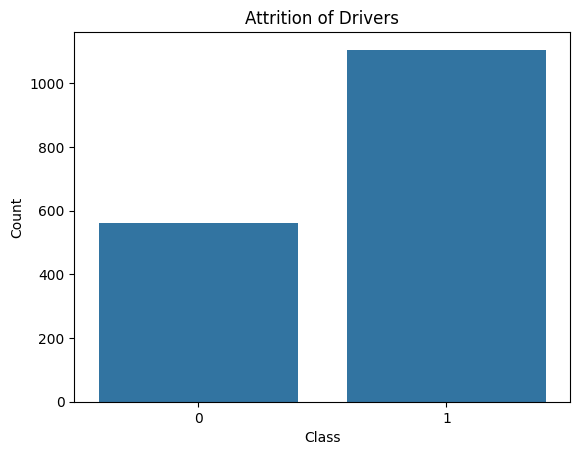

In [ ]:
# Plotting the class data

sns.countplot(data = y_train, x = 'Attrition')
plt.title("Attrition of Drivers")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
y_train.value_counts()

Attrition
1            1106
0             560
Name: count, dtype: int64

There is clearly data imbalance, so fixing that via SMOTE

In [ ]:
# Implementing SMOTE to Oversample training dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

# Convert 'Attrition' column to a recognized type (e.g., numeric)
y_train['Attrition'] = y_train['Attrition'].astype(int)

# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_sm.value_counts())

Before SMOTE
Attrition
1            1106
0             560
Name: count, dtype: int64
After Oversampling
Attrition
0            1106
1            1106
Name: count, dtype: int64


## ***Standardization***

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X_sm = pd.DataFrame(st.fit_transform(X_sm.values), columns = X_train.columns)
X_test_scaled = pd.DataFrame(st.transform(X_test.values), columns = X_test.columns)

In [ ]:
# Driver_ID feature is irrelevant for prediction hence dropping the column
X_sm.drop(['Driver_ID'], axis = 1, inplace = True)
X_test.drop(['Driver_ID'], axis = 1, inplace = True)
X_test_scaled.drop(['Driver_ID'], axis = 1, inplace = True)

In [ ]:
X_sm.head(2)

Age    Gender      City  Education_Level    Income  \
0 -0.632745 -0.876066 -0.002701         1.297539  0.344331   
1  1.281221 -0.876066  0.407291         1.297539  2.504838   

   Joining Designation     Grade  Improved_Quarterly_Rating  \
0             0.183021 -0.185647                   1.006134   
1             0.183021  1.990444                   1.006134   

   Improved_Quarterly_Rating1  Average Business Value    Tenure  
0                    2.072291               -0.055346 -0.451982  
1                   -0.531597                1.400614  2.355154

In [ ]:
X_test_scaled.head(2)

Age    Gender      City  Education_Level    Income  \
0  0.237240 -0.876066  2.253558         1.297539 -0.372552   
1 -0.284751 -0.876066 -0.002701         0.014514 -0.410335   

   Joining Designation     Grade  Improved_Quarterly_Rating  \
0             0.183021 -0.185647                  -1.011988   
1            -1.049835 -1.273692                  -1.011988   

   Improved_Quarterly_Rating1  Average Business Value    Tenure  
0                   -0.531597               -0.760294 -0.742722  
1                   -0.531597               -0.760294 -0.680898

## ***Decision Tree Algorithm***


**1)	Train the model and check if it is overfitting or underfitting**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialising Instance
DTC = DecisionTreeClassifier(criterion='entropy')

# Fitting the model
DTC.fit(X_sm, y_sm)

# Getting model score for test and train data
print(f"Training data score: {DTC.score(X_sm, y_sm)}")
print(f"Testing data score: {DTC.score(X_test_scaled, DTC.predict(X_test_scaled))}")

Training data score: 1.0
Testing data score: 1.0


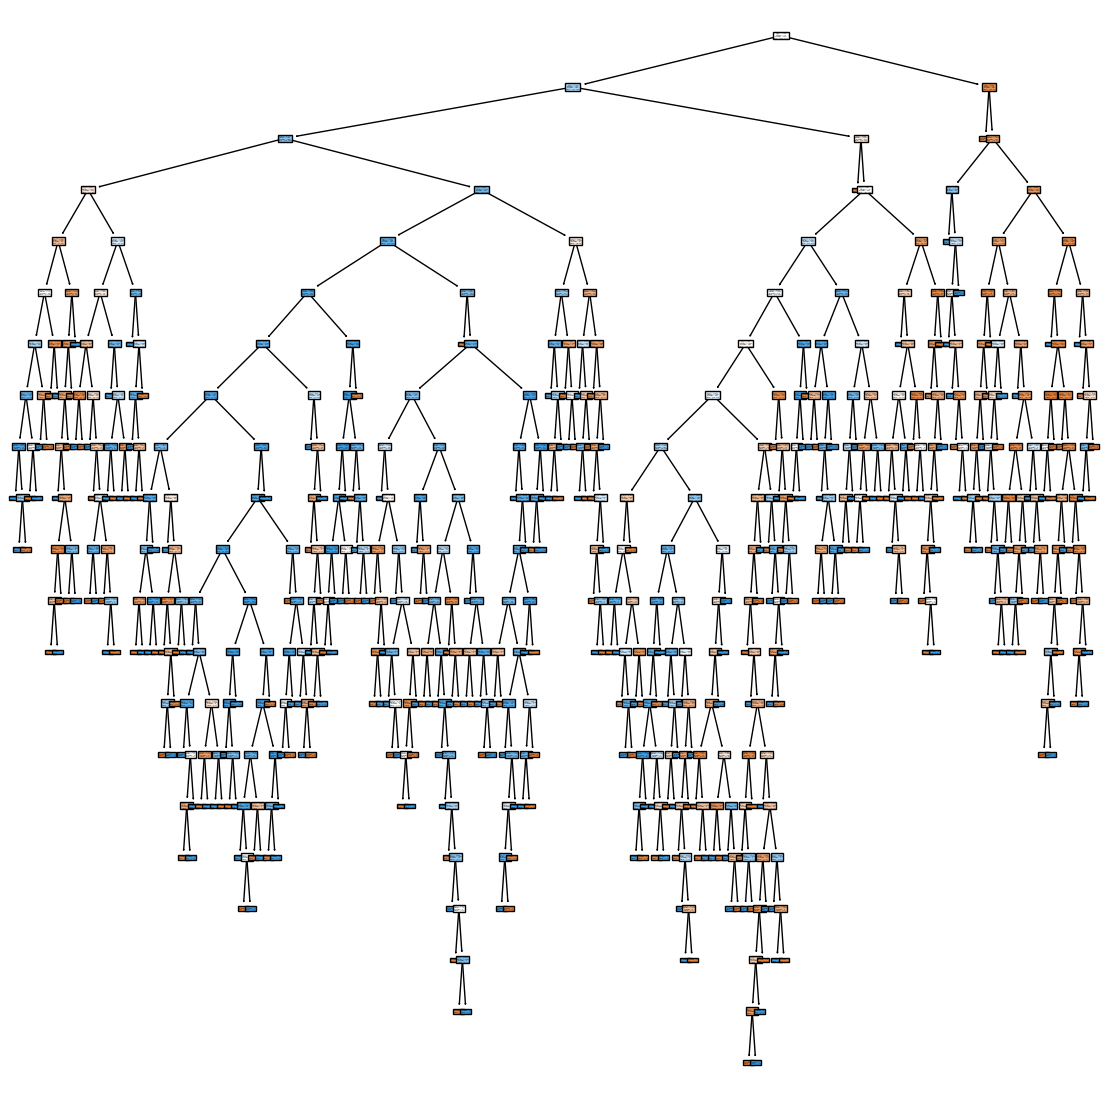

In [ ]:
# Visualizing DT to see how deep DT is hence over fitting

from sklearn.tree import plot_tree

plt.figure(figsize=(14,14))
plot_tree(DTC, filled = True);

**2)	Perform hyper-parameter tuning to fix overfitting or underfitting problem**

In [ ]:
# K Fold Cross Validation and Hyper parameter tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,6,7,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth: {depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth: 3 Accuracy Mean: Train: 74.40722446991361 Validation: 67.31482613835554
K-Fold for depth: 3 Accuracy Std: Train: 0.8444153396421027 Validation: 4.218569503267549
***************
K-Fold for depth: 4 Accuracy Mean: Train: 77.17499097698438 Validation: 73.23182911418205
K-Fold for depth: 4 Accuracy Std: Train: 0.23817978296835157 Validation: 6.019853683629957
***************
K-Fold for depth: 5 Accuracy Mean: Train: 78.6668298801895 Validation: 73.3268109738698
K-Fold for depth: 5 Accuracy Std: Train: 0.4286943693236552 Validation: 3.1831111633732694
***************
K-Fold for depth: 6 Accuracy Mean: Train: 81.65568424745527 Validation: 73.87000122294239
K-Fold for depth: 6 Accuracy Std: Train: 0.8979078925952069 Validation: 3.3828873075488737
***************
K-Fold for depth: 7 Accuracy Mean: Train: 83.98135579959062 Validation: 75.31776120011415
K-Fold for depth: 7 Accuracy Std: Train: 0.6977073258612561 Validation: 2.783841262683009
***************
K-Fold for depth: 9

**3) Train with best parameters**

In [ ]:
# Training with best parameters

tree_clf = DecisionTreeClassifier(random_state=10, max_depth=5)
tree_clf = tree_clf.fit(X_sm, y_sm)
pred = tree_clf.predict(X_test_scaled)

print(f"Accuracy score: {tree_clf.score(X_test_scaled, pred)}")

Accuracy score: 1.0


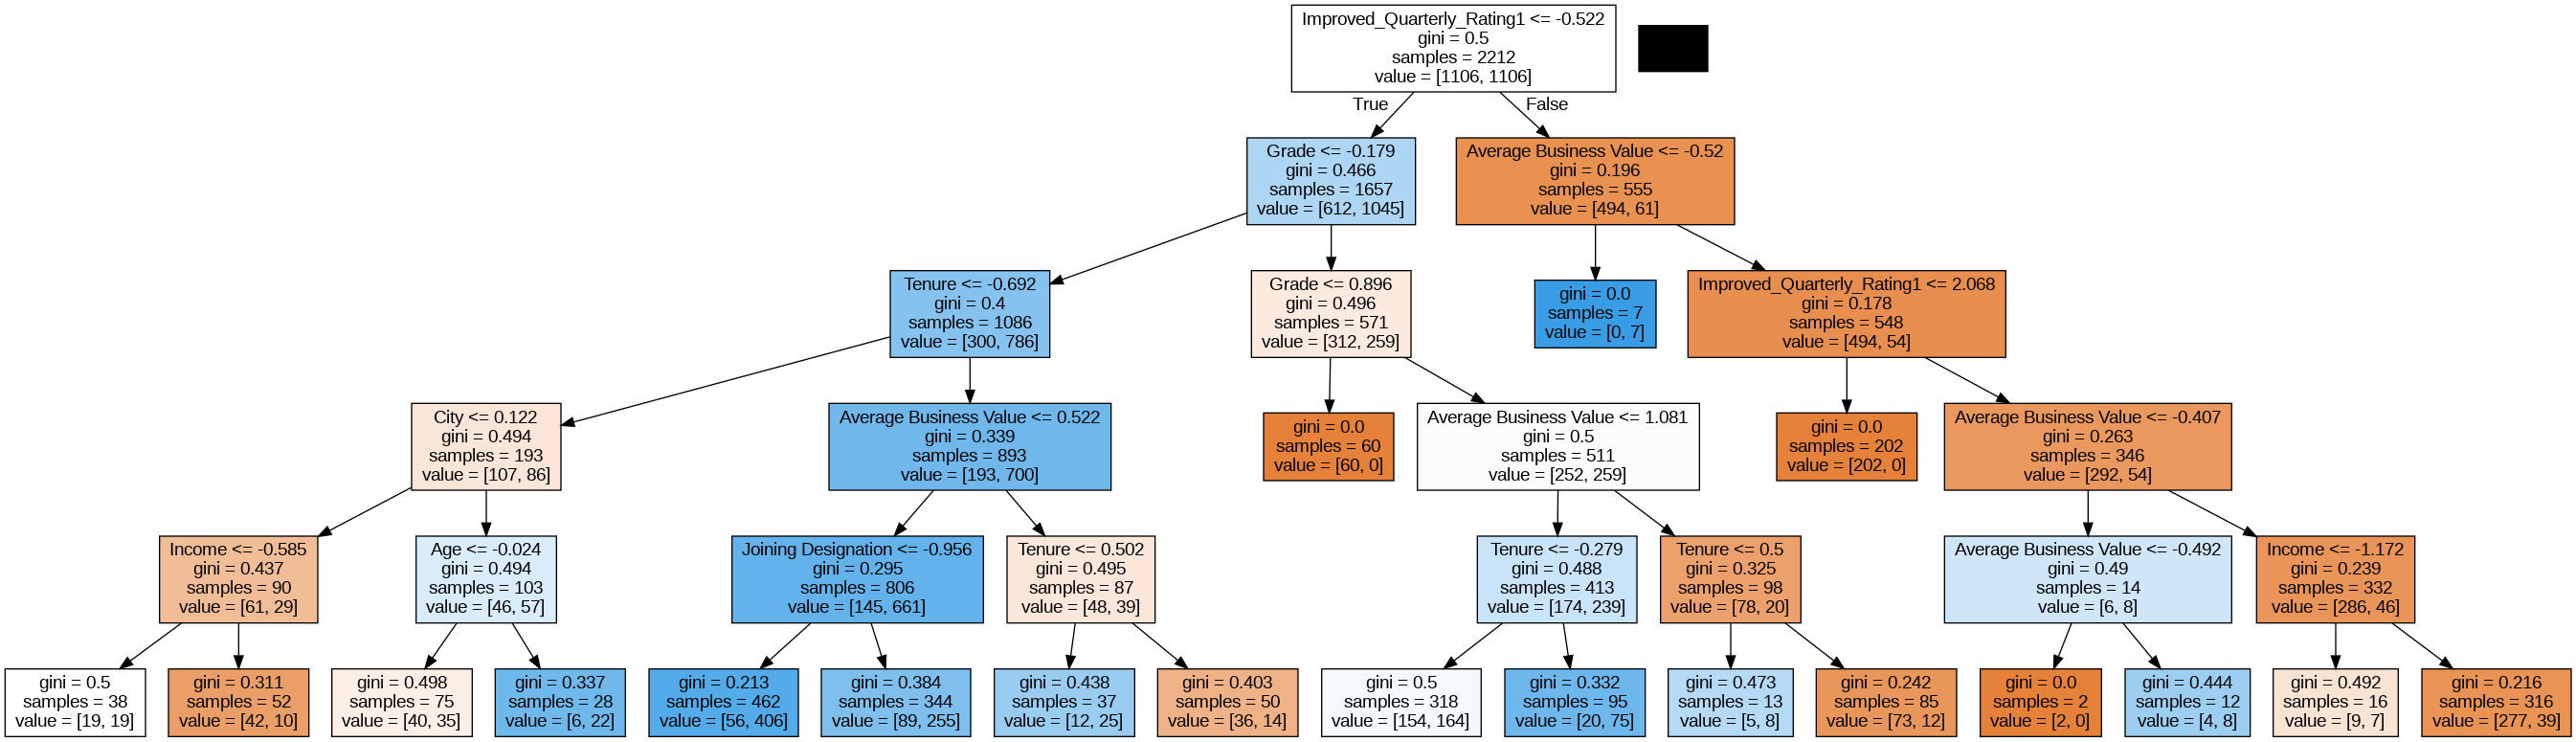

In [ ]:
# Visualize DT

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_sm.columns)

# Ensure the target variable 'Attrition' is not there in the feature list
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

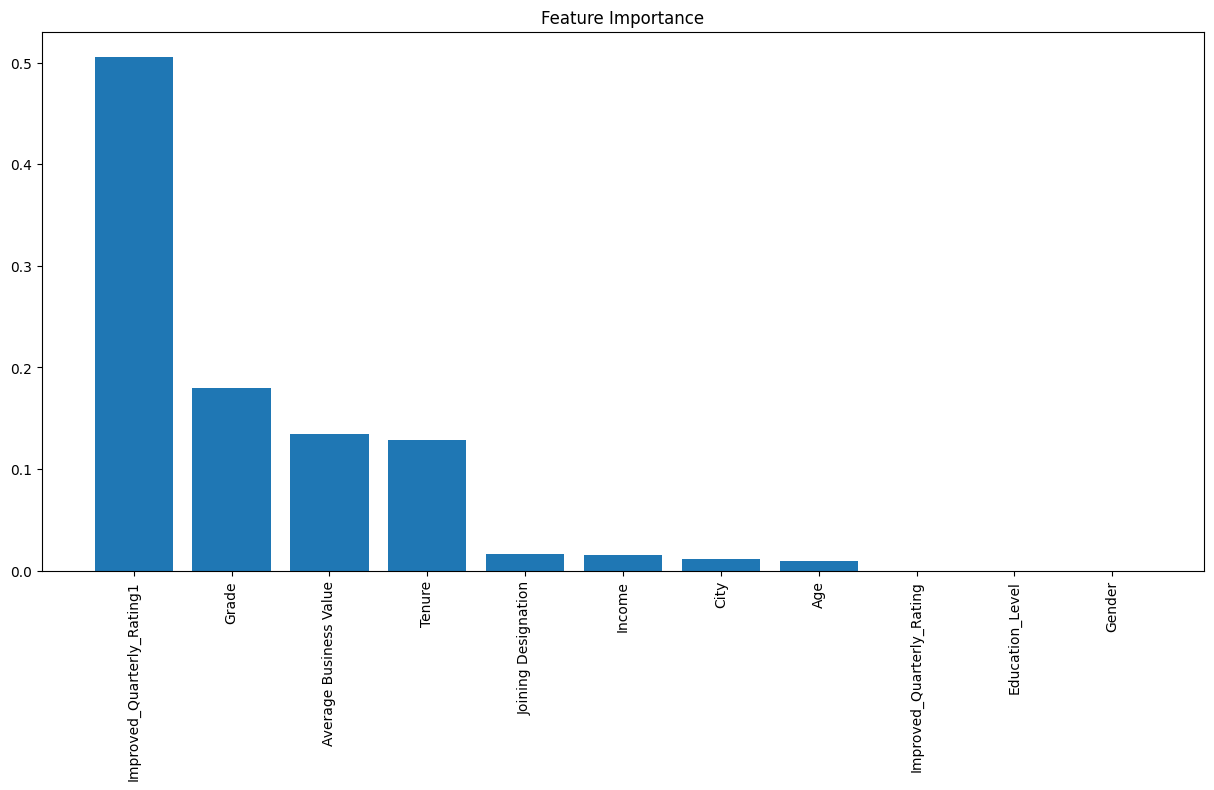

In [ ]:
# Plotting feature Importances
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot


**5) Evaluation**

In [ ]:
# Evaluation
from sklearn.metrics import classification_report

y_pred = tree_clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       205
           1       0.84      0.86      0.85       510

    accuracy                           0.78       715
   macro avg       0.74      0.73      0.73       715
weighted avg       0.78      0.78      0.78       715



**Comments:**

***Decision Tree Algorithm Performance***
- Accuracy: 78%
- Precision: 84%
- Recall: 86%
- F1 score: 85%
- Important features
>- Improved_Quarterly_Rating1
>- Grade
>- Average Business Value
>- Tenure
>- Joining Designation
>- Income

## ***Ensemble - Bagging Algorithm (Random Forest)***


**1) Train the model to check initial performance (set a benchmark)**

In [ ]:
# Saving scaled, balanced training data into new df
X_train = X_sm.copy()
y_train = y_sm.copy()

In [ ]:
# Initializing the RF Classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)   # n_estimators (number of DTs)

# Performing Cross Validation using RF model
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

K-Fold Accuracy Mean: 
 Train: 79.45 
 Validation: 75.13
K-Fold Accuracy Std: 
 Train: 1.43, 
 Validation: 3.66


**2)	Hyper-parameter tuning: Optimizing Random Forest Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform
import datetime as dt


params = {
          'n_estimators' : [170,175],        #170
          'max_depth' : [9,12],              #9
          'criterion' : ['entropy'],
          'bootstrap' : [True],
          'max_features' : [9,11],           #9
          'min_samples_leaf' : [2,3],        #2
          'min_samples_split' : [5,6],       #5 #6
          'max_leaf_nodes' : [30,32],        #30
          'ccp_alpha' : [0.005]              #0.003
         }

'''
rfc = RandomForestClassifier()
clf = RandomizedSearchCV(estimator = rfc,
                    param_distributions = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_iter = 15,
                    n_jobs=-1
                    )
'''

rfc = RandomForestClassifier()
clf = GridSearchCV(estimator = rfc,
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )


start = dt.datetime.now()
clf.fit(X_train, y_train)                   #Takes time because it has to fit 4*3*2*2*3 = 144 models
end = dt.datetime.now()
print(f"Time taken for fits : {end - start}")
print("Best params: ", clf.best_params_)
print("Best score: ", clf.best_score_)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank:   {res['rank_test_score'][i]}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Time taken for fits : 0:04:03.256464
Best params:  {'bootstrap': True, 'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 11, 'max_leaf_nodes': 32, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 170}
Best score:  0.7943259803470942
Parameters:{'bootstrap': True, 'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 170} Mean_score: 0.7762456502900624 Rank:   64
Parameters:{'bootstrap': True, 'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 175} Mean_score: 0.7861897705363304 Rank:   34
Parameters:{'bootstrap': True, 'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 170} Mean_score: 0.7893563716279406 Rank:   11


**3) Train with best parameters**

In [ ]:
# best parameter
print(clf.best_estimator_)

rfc = clf.best_estimator_

rfc.fit(X_train, y_train)

print("Model acc",rfc.score(X_test_scaled, y_test))

RandomForestClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=12,
                       max_features=11, max_leaf_nodes=32, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=170)


<ipython-input-245-48595559b0ef>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Model acc 0.806993006993007


In [ ]:
# train score
print("Training accuracy",rfc.score(X_train, y_train))

# test score
print("Test accuracy",rfc.score(X_test_scaled, y_test))

Training accuracy 0.85623869801085
Test accuracy 0.806993006993007


**4) Plotting Feature Importances**

<ipython-input-247-5e411f1819e1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


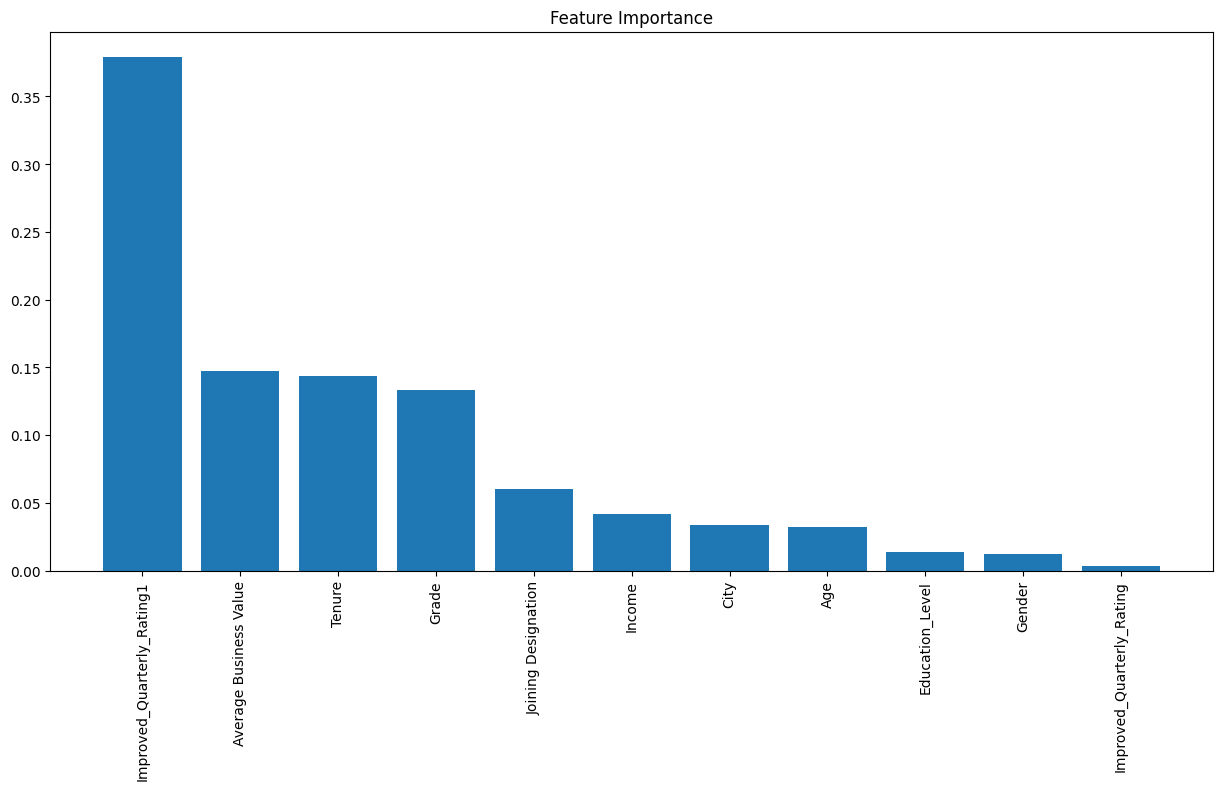

In [ ]:
# Computing Feature Importance

import matplotlib.pyplot as plt

rfc.fit(X_train, y_train)
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

**5) Evaluation**

In [ ]:
# Evaluation
from sklearn.metrics import classification_report

y_pred = rfc.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       205
           1       0.88      0.85      0.86       510

    accuracy                           0.81       715
   macro avg       0.76      0.77      0.77       715
weighted avg       0.81      0.81      0.81       715



**Comments:**

***Random Forest Algorithm Performance***
- Accuracy: 81%
- Precision: 88%
- Recall: 85%
- F1 score: 86%
- Important features
>- Improved_Quarterly_Rating1
>- Average Business Value
>- Tenure
>- Grade
>- Joining Designation

## ***Ensemble - Boosting Algorithm (GBDT, XGBoost)***


### ***GBDT***

**1)	Train the model and check if it is overfitting or underfitting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialising Instance
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss')

# Fitting the model
gbc.fit(X_train, y_train)

# Getting model score for test and train data
print(f"Train accuracy: {gbc.score(X_train, y_train)*100:.2f}")
print(f"Test accuracy: {gbc.score(X_test, y_test)*100:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy: 85.40
Test accuracy: 28.67


**2)	Perform Regularization and hyper-parameter tuning to fix overfitting or underfitting problem**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GBC
from scipy.stats import uniform
import datetime as dt

params = {
    "n_estimators": [245,250,260],
    "max_depth" : [10,11,12],
    #"min_samples_split" : [2, 3, 4, 5, 6],
    #"min_samples_leaf" : [1, 2, 3, 4, 5],
    "max_leaf_nodes" : [65,70,80],
    "learning_rate": [0.5],
    #"loss" : ['deviance','exponential']
}

'''
gbc = GBC()
gbc_clf = RandomizedSearchCV(estimator = gbc,
                    param_distributions = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_iter = 20,
                    n_jobs=-1,
                    verbose = 1
                    )
'''

gbc = GBC()
gbc_clf = GridSearchCV(estimator = gbc,
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )


start = dt.datetime.now()
gbc_clf.fit(X_train, y_train)
end = dt.datetime.now()

res = gbc_clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters:{'learning_rate': 0.5, 'max_depth': 10, 'max_leaf_nodes': 65, 'n_estimators': 245} Mean_score: 0.8155814914096676 Rank: 17
Parameters:{'learning_rate': 0.5, 'max_depth': 10, 'max_leaf_nodes': 65, 'n_estimators': 250} Mean_score: 0.8155796528566824 Rank: 18
Parameters:{'learning_rate': 0.5, 'max_depth': 10, 'max_leaf_nodes': 65, 'n_estimators': 260} Mean_score: 0.8155839428136479 Rank: 15
Parameters:{'learning_rate': 0.5, 'max_depth': 10, 'max_leaf_nodes': 70, 'n_estimators': 245} Mean_score: 0.8192009893866464 Rank: 6
Parameters:{'learning_rate': 0.5, 'max_depth': 10, 'max_leaf_nodes': 70, 'n_estimators': 250} Mean_score: 0.8160392911029971 Rank: 11
Parameters:{'learning_rate': 0.5, 'max_depth': 10, 'max_leaf_nodes': 70, 'n_estimators': 260} Mean_score: 0.8142289292635124 Rank: 21
Parameters:{'learning_rate': 0.5, 'max_depth': 10, 'max_leaf_nodes': 80, 'n_estimators': 245} Mean_score: 0.8155857813666332 Rank: 14
Parameters:{'learning_rate': 0.5, 'max_depth': 10, 'max_leaf_no

In [ ]:
print(f"Time taken for fits : {end - start}")
print(gbc_clf.best_estimator_)

Time taken for fits : 0:01:47.440597
GradientBoostingClassifier(learning_rate=0.5, max_depth=12, max_leaf_nodes=80,
                           n_estimators=250)


**3) Training with best parameters**

In [ ]:
gbc = gbc_clf.best_estimator_

gbc.fit(X_train, y_train)

print("Model acc",gbc.score(X_test_scaled, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model acc 0.8041958041958042


In [ ]:
# train score
print("Training accuracy",gbc.score(X_train, y_train))

# test score
print("Test accuracy",gbc.score(X_test_scaled, y_test))

Training accuracy 1.0
Test accuracy 0.8041958041958042


**4) Plotting Feature Importances**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


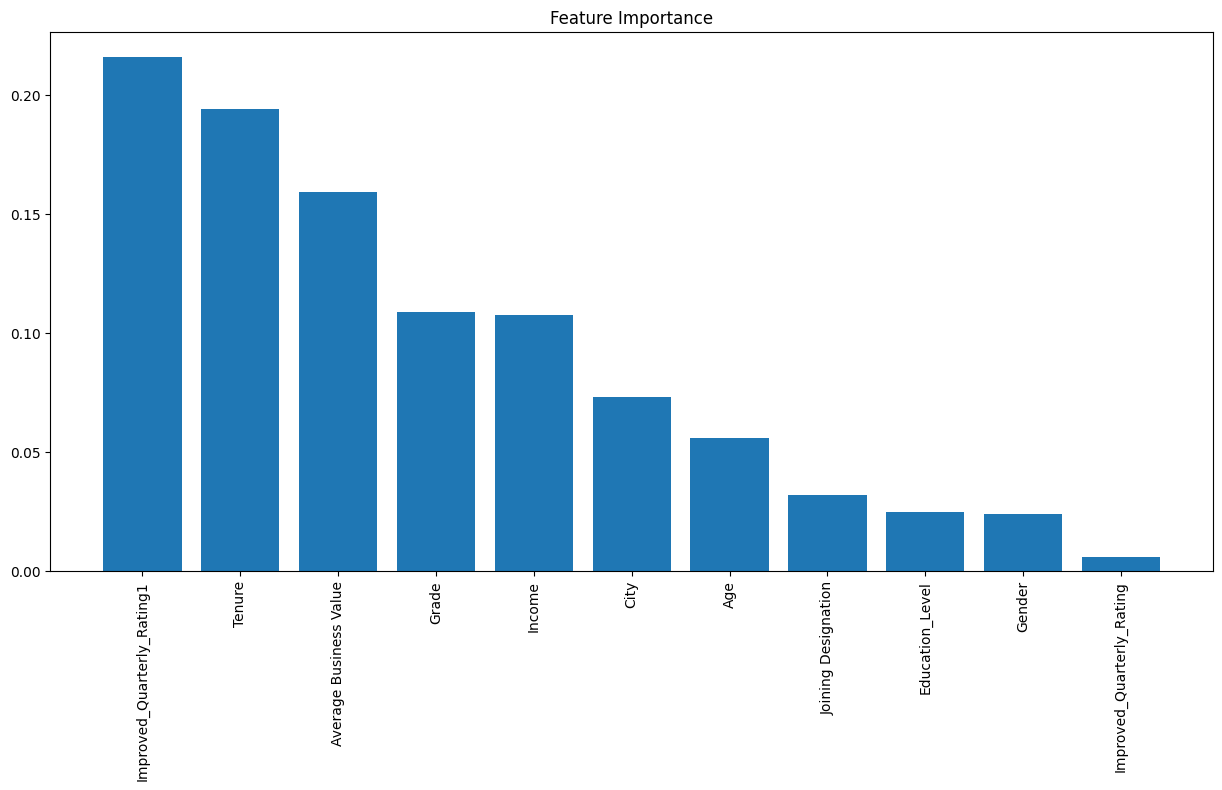

In [ ]:
# Computing Feature Importance

import matplotlib.pyplot as plt

gbc.fit(X_train, y_train)
importances = gbc.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

**5) Evaluation**

In [ ]:
# Evaluation
from sklearn.metrics import classification_report

y_pred = gbc.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       205
           1       0.86      0.85      0.86       510

    accuracy                           0.80       715
   macro avg       0.76      0.76      0.76       715
weighted avg       0.80      0.80      0.80       715



**Comments:**

***Gradient Boosting Algorithm Performance***
- Accuracy: 80%
- Precision: 86%
- Recall: 85%
- F1 score: 86%
- Important features
>- Improved_Quarterly_Rating1
>- Tenure
>- Average Business Value
>- Grade
>- Income
>- City
>- Joining Designation
>- Age

### ***XGBoost***

**Comments:**
Since XGBoost does not support categorical variables natively, so it is necessary to encode them prior to training hence using df_drivers1 instead of df_drivers for training XGBoost model.

In [ ]:
df_drivers1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   Age                         2381 non-null   int64         
 2   Gender                      2381 non-null   int64         
 3   City                        2381 non-null   object        
 4   Education_Level             2381 non-null   int64         
 5   Income                      2381 non-null   int64         
 6   Dateofjoining               2381 non-null   datetime64[ns]
 7   LastWorkingDate             2381 non-null   datetime64[ns]
 8   Joining Designation         2381 non-null   int64         
 9   Grade                       2381 non-null   int64         
 10  Improved_Quarterly_Rating   2381 non-null   int64         
 11  Improved_Quarterly_Rating1  2381 non-null   int64       

**Target Encoding City**

In [ ]:
df_drivers1.head(2)

Driver_ID  Age  Gender City  Education_Level  Income Dateofjoining  \
0          1   28       0  C23                2   57387    2018-12-24   
1          2   31       0   C7                2   67016    2020-11-06   

  LastWorkingDate  Joining Designation  Grade  Improved_Quarterly_Rating  \
0      2019-03-11                    1      1                          0   
1      2020-12-31                    2      2                          0   

   Improved_Quarterly_Rating1  Average Business Value  Attrition  Tenure  
0                           0                571860.0          1      77  
1                           0                     0.0          0      55

In [ ]:
#features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.
!pip install category_encoders
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['City']) #Insert the variable / columns to be updated
df_drivers1 = ce_target.fit_transform(df_drivers1, df_drivers1['Attrition'])  #Insert target variable

In [ ]:
df_drivers1.head(2)

Driver_ID  Age  Gender      City  Education_Level  Income Dateofjoining  \
0          1   28       0  0.769859                2   57387    2018-12-24   
1          2   31       0  0.684190                2   67016    2020-11-06   

  LastWorkingDate  Joining Designation  Grade  Improved_Quarterly_Rating  \
0      2019-03-11                    1      1                          0   
1      2020-12-31                    2      2                          0   

   Improved_Quarterly_Rating1  Average Business Value  Attrition  Tenure  
0                           0                571860.0          1      77  
1                           0                     0.0          0      55

**Data Splitting**

In [ ]:
X1 = df_drivers1.drop(['Attrition','LastWorkingDate','Dateofjoining','Driver_ID'],axis = 1)
y1 = df_drivers1[['Attrition']].copy()

In [ ]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1)

print("Number transactions on training dataset: ", X_train1.shape, y_train1.shape)
print("Number transactions testing dataset: ", X_test1.shape, y_test1.shape)

Number transactions on training dataset:  (1666, 11) (1666, 1)
Number transactions testing dataset:  (715, 11) (715, 1)


**Handling Class Imbalance**

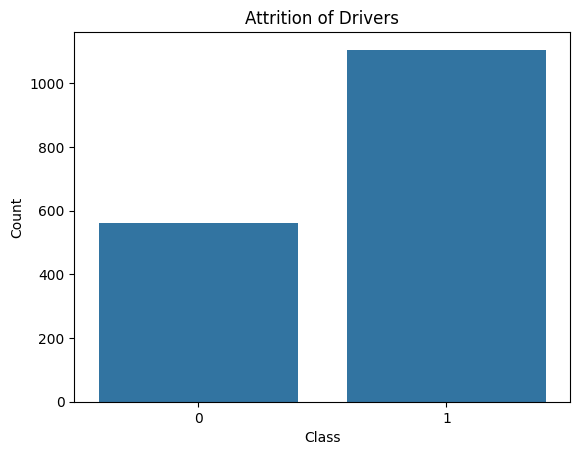

In [ ]:
# Plotting the class data

sns.countplot(data = y_train1, x = 'Attrition')
plt.title("Attrition of Drivers")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Implementing SMOTE to Oversample training dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

# Convert 'Attrition' column to a recognized type (e.g., numeric)
y_train1['Attrition'] = y_train1['Attrition'].astype(int)

# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train1.value_counts())

X_sm1, y_sm1 = smt.fit_resample(X_train1, y_train1)

print('After Oversampling')
print(y_sm1.value_counts())

Before SMOTE
Attrition
1            1106
0             560
Name: count, dtype: int64
After Oversampling
Attrition
0            1106
1            1106
Name: count, dtype: int64


**Standardization**

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X_train1 = pd.DataFrame(st.fit_transform(X_sm1.values, y_sm1.values), columns = X_train1.columns)
X_test_scaled1 = pd.DataFrame(st.transform(X_test1.values), columns = X_test1.columns)

**1) Train the model to check performance**

In [ ]:
from xgboost import XGBClassifier

# Assuming X_train and X_test are pandas DataFrames
# Convert 'object' columns to categorical if they represent categorical data
X_train = X_train.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)
X_test = X_test.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

# Initialising Instance
model = XGBClassifier()
                      #n_estimators=50,
                      #max_depth=2,
                      #learning_rate=1,
                      #objective='binary:logistic',
                      #enable_categorical=True) # Enable categorical support

# Fitting the model
model.fit(X_train, y_train)

# Getting model score for test and train data
print(f"Train accuracy: {model.score(X_train, y_train)*100:.2f}")
print(f"Test accuracy: {model.score(X_test_scaled, y_test)*100:.2f}")

Train accuracy: 99.91
Test accuracy: 80.28


**2) Hyper parameter tuning to find best estimates**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        "n_estimators": [95,100,105],     #100 (82.32)
        "max_depth" : [5,6,7],              #6
        "learning_rate": [0.1,0.15],      #0.15
        'subsample': [0.9,1],             #1 range is [0,1]
        'colsample_bytree': [0.8,0.9],  #0.9
        'reg_alpha': [0,0.1],                 #0
        'reg_lambda': [0.5,0.6]               #0.5
        }

'''
xgb = XGBClassifier(objective='multi:softmax', num_class=20, silent=True)
xgb_clf = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)

'''
xgb = XGBClassifier(objective='multi:softmax', num_class=20, silent=True)
xgb_clf = GridSearchCV(estimator = xgb,
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )


start = dt.datetime.now()
xgb_clf.fit(X_train, y_train)
end = dt.datetime.now()

# Time taken for model to fit
print(f"Time taken for fits : {end - start}")
print("Best params: ", xgb_clf.best_params_)
print("Best score: ", xgb_clf.best_score_)

# Identify best parameters
res = xgb_clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:27:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Time taken for fits : 0:08:27.062680
Best params:  {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 95, 'reg_alpha': 0, 'reg_lambda': 0.6, 'subsample': 0.9}
Best score:  0.8296065864322144
Parameters:{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 95, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.9} Mean_score: 0.8214685380684653 Rank: 87
Parameters:{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 95, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 1} Mean_score: 0.8110666181288678 Rank: 285
Parameters:{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 95, 'reg_alpha': 0, 'reg_lambda': 0.6, 'subsample': 0.9} Mean_score: 0.8214691509194604 Rank: 86
Parameters:{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 95, 'reg_alpha': 0, 'reg_lambda': 0.6, 'subsample': 1} Mean_score: 0.8128708514584014 Rank: 275
Parameters:{'colsample_bytree

**3) Training with best estimates**

In [ ]:
# Best estimator
print(xgb_clf.best_estimator_)

xgb = xgb_clf.best_estimator_

xgb.fit(X_train, y_train)

print("Model acc",xgb.score(X_test_scaled, y_test))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=95, n_jobs=None, num_class=20,
              num_parallel_tree=None, ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Model acc 0.8195804195804196


**4) Plotting feature importance**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:27:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


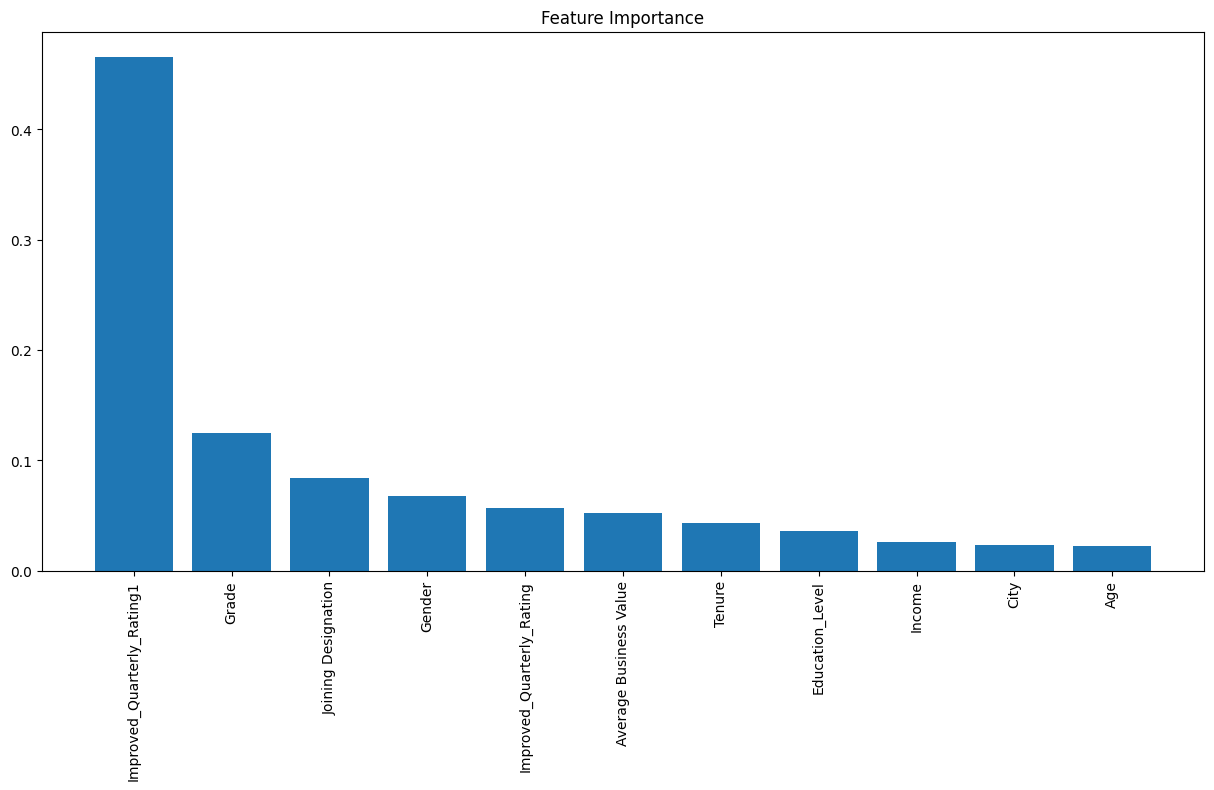

In [ ]:
# Computing Feature Importance

import matplotlib.pyplot as plt

xgb.fit(X_train, y_train)
importances = xgb.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

**5) Evaluation**

In [ ]:
# Evaluation
from sklearn.metrics import classification_report

y_pred = xgb.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       205
           1       0.87      0.88      0.87       510

    accuracy                           0.82       715
   macro avg       0.78      0.78      0.78       715
weighted avg       0.82      0.82      0.82       715



**Comments:**

***XGBoost Algorithm Performance***
- Accuracy: 82%
- Precision: 87%
- Recall: 88%
- F1 score: 87%
- Important features
>- Improved_Quarterly_Rating1
>- Grade
>- Joining Designation
>- Gender
>- Improved_Quarterly_Rating
>- Average Business Value


### **Ensemble Methods - Stacking & Voting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score

# Initialize the base learners
rf = RandomForestClassifier(random_state=10)
gbc = GradientBoostingClassifier(random_state=10)
xgb = XGBClassifier(random_state=10)
lgbm = LGBMClassifier(random_state=10)
ada = AdaBoostClassifier(random_state=10)

# Initialize the Stacking Classifier using XGBoost as meta-learner
stacking_clf = StackingClassifier(classifiers=[rf, gbc, lgbm, ada],   #IMP**** - Use classifiers instead of estimators
                                  meta_classifier= xgb,
                                  use_probas=True,
                                  average_probas=False)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking model
stacking_predictions = stacking_clf.predict(X_test_scaled)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("---"*10)
print(f"Stacking Model Accuracy: {stacking_accuracy}")
print("---"*10)

# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('gbc', gbc), ('xgb', xgb), ('lgbm', lgbm), ('ada', ada)
])

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the voting model
voting_predictions = voting_clf.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, voting_predictions)
print("---"*10)
print(f"Voting Model Accuracy: {voting_accuracy}")

# Compare the accuracies
print("---"*10)
if stacking_accuracy > voting_accuracy:
    print("Stacking ensemble is more accurate.")
elif stacking_accuracy < voting_accuracy:
    print("Voting ensemble is more accurate.")
else:
    print("Both ensembles have the same accuracy.")
print("---"*10)


/usr/local/lib/python3.10/dist-packages/mlxtend/classifier/stacking_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1106, number of negative: 1106
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1854
[LightGBM] [Info] Number of data points in the train set: 2212, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
------------------------------
Stacking Model Accuracy: 0.8111888111888111
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1106, number of negative: 1106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1854
[LightGBM] [Info] Number of data points in the train set: 2212, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
------------------------------
Voting Model Accuracy: 0.8293706293706293
------------------------------
Voting ensemble is more accurate.
------------------------------


**Comments:**
- Stacking Model Accuracy: 0.8111888111888111
- Voting Model Accuracy: 0.8293706293706293
-**Voting ensemble is more accurate.**

## **Bivariate / Multivariate Analysis**

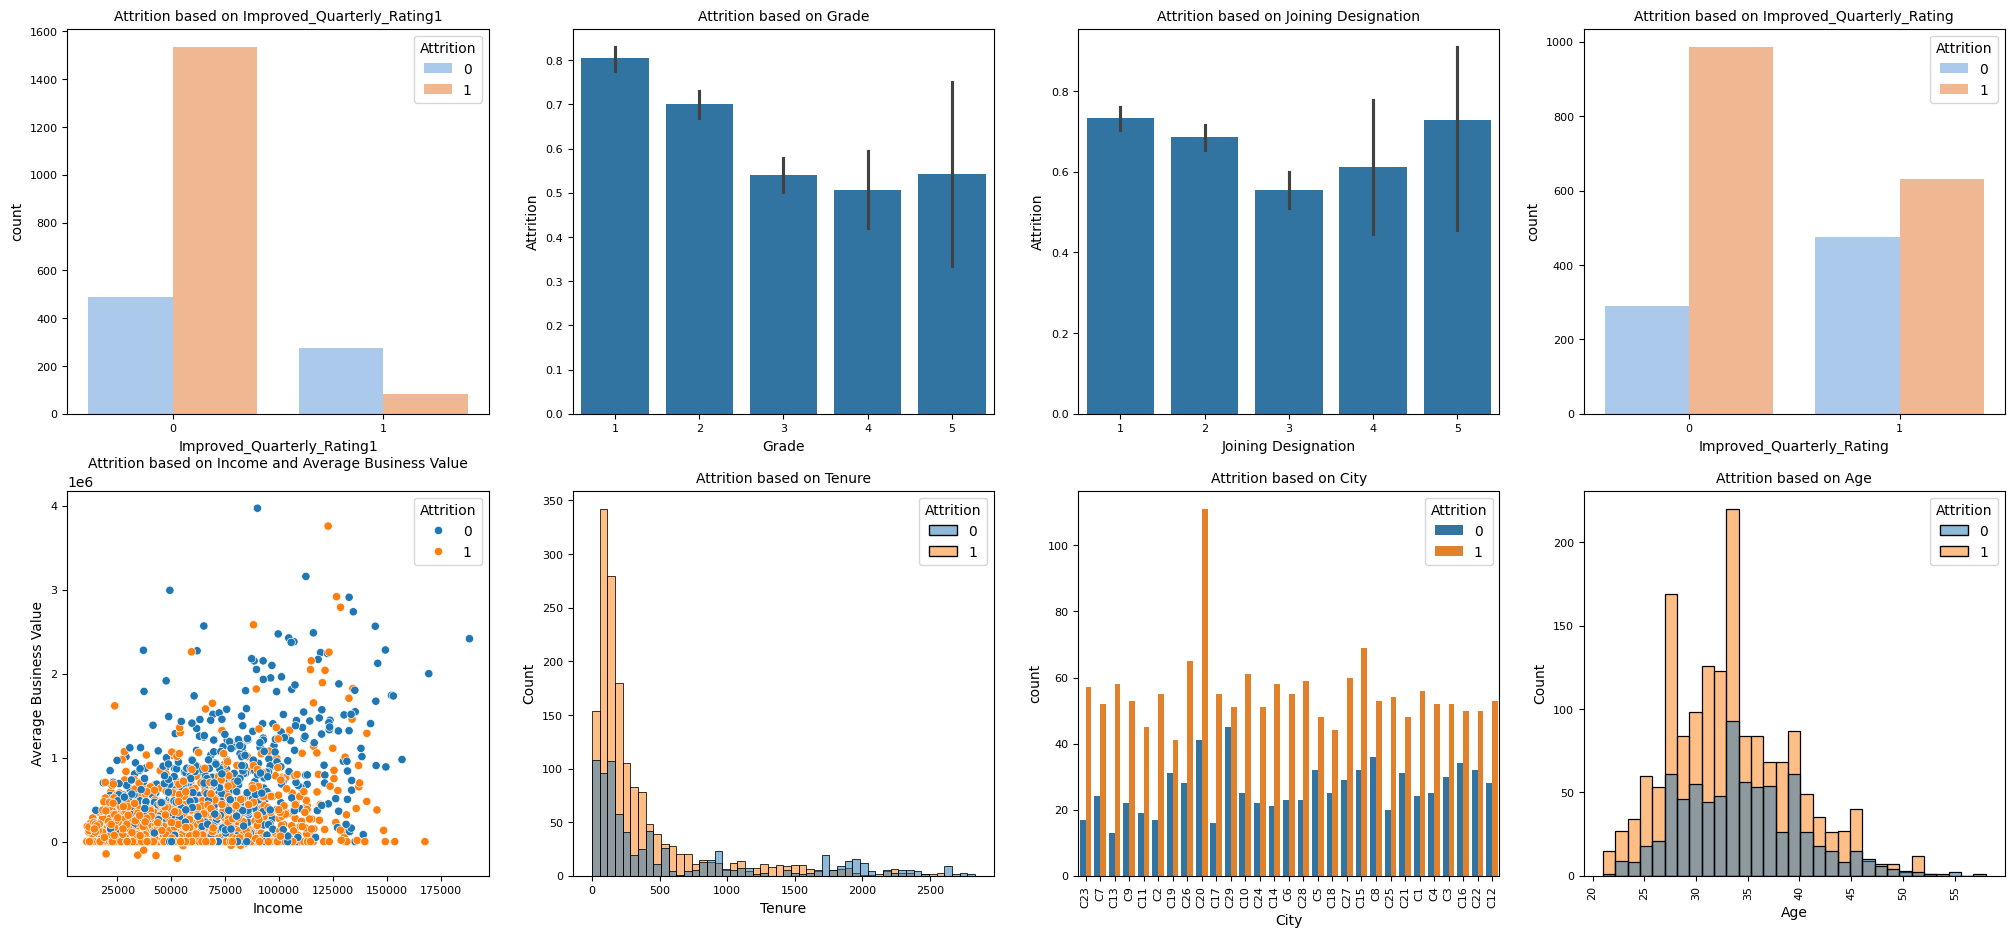

In [ ]:
# Potting to important features against target variable to understand their correlation

'''
IMPORTANT FEATURES AS PER MODELS:
Improved_Quarterly_Rating1
Grade
Joining Designation
Improved_Quarterly_Rating
Average Business Value
Tenure
Income
City
'''

plt.figure(figsize = (25,11))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Attrition based on Improved_Quarterly_Rating1",fontsize = 10)
sns.countplot(data = df_drivers1, x = 'Improved_Quarterly_Rating1', hue = 'Attrition', palette = 'pastel')

plt.subplot(2,4,2)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Attrition based on Grade",fontsize = 10)
sns.barplot(data = df_drivers1, x = 'Grade', y = 'Attrition')

plt.subplot(2,4,3)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Attrition based on Joining Designation",fontsize = 10)
sns.barplot(data = df_drivers1, x = 'Joining Designation', y = 'Attrition')

plt.subplot(2,4,4)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Attrition based on Improved_Quarterly_Rating",fontsize = 10)
sns.countplot(data = df_drivers1, x = 'Improved_Quarterly_Rating', hue = 'Attrition', palette = 'pastel')

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Attrition based on Income and Average Business Value",fontsize = 10)
sns.scatterplot(data = df_drivers1, y = 'Average Business Value', x = 'Income', hue = 'Attrition')

plt.subplot(2,4,6)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Attrition based on Tenure",fontsize = 10)
sns.histplot(data = df_drivers1, x = 'Tenure', hue = 'Attrition')

plt.subplot(2,4,7)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8, rotation = 90)
plt.title("Attrition based on City",fontsize = 10)
sns.countplot(data = df_drivers2, x = 'City', hue = 'Attrition')

plt.subplot(2,4,8)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8, rotation = 90)
plt.title("Attrition based on Age",fontsize = 10)
sns.histplot(data = df_drivers2, x = 'Age', hue = 'Attrition')

plt.show()

In [ ]:
# % of Drivers with quarterly rating of 5
np.round(((df[df['Quarterly Rating'] == 5]['Driver_ID'].nunique()) / (df['Driver_ID'].nunique()))*100,2)

0.0

In [ ]:
(df['Quarterly Rating'] == 5).value_counts()

Quarterly Rating
False    19104
Name: count, dtype: int64

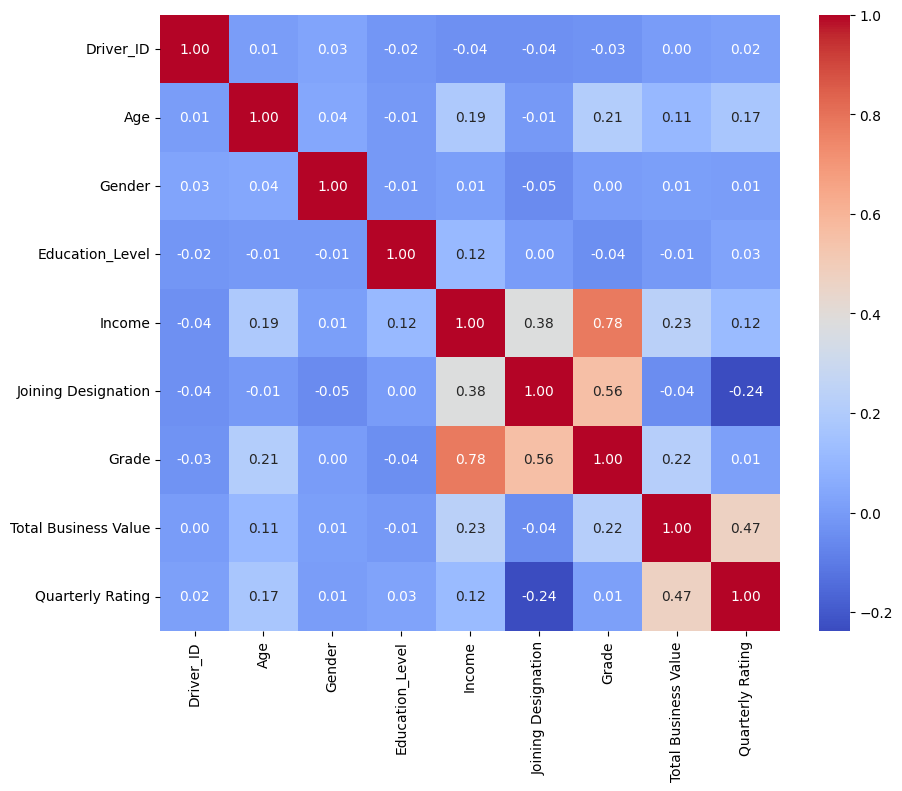

In [ ]:
# Using heatmap to identify correlation between numerical data

import seaborn as sns

# Compute the correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # Fill in the blank to compute correlation

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # Fill in the blank to plot the heatmap

# Show the plot
plt.show()

In [ ]:
df_drivers2.head(2)

Driver_ID  Age Gender City Education_Level  Income Dateofjoining  \
0          1   28      0  C23               2   57387    2018-12-24   
1          2   31      0   C7               2   67016    2020-11-06   

  LastWorkingDate Joining Designation Grade Improved_Quarterly_Rating  \
0      2019-03-11                   1     1                         0   
1      2020-12-31                   2     2                         0   

  Improved_Quarterly_Rating1  Average Business Value  Attrition  Tenure  
0                          0                571860.0          1      77  
1                          0                     0.0          0      55

In [ ]:
#City which showed the most improvement in Quarterly Rating over the past year 2020
df_drivers2[df_drivers2['LastWorkingDate'].dt.year == 2020].groupby('City')['Improved_Quarterly_Rating'].mean().sort_values(ascending = False)[:5]

City
C26    0.647059
C6     0.591837
C22    0.578947
C29    0.575342
C8     0.561404
Name: Improved_Quarterly_Rating, dtype: object

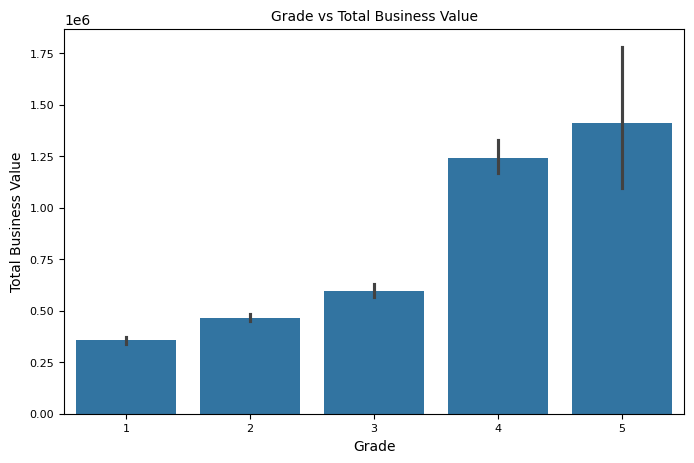

In [ ]:
plt.figure(figsize=(8, 5))
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Grade vs Total Business Value",fontsize = 10)
sns.barplot(data = df, x = 'Grade', y = 'Total Business Value')
plt.show()

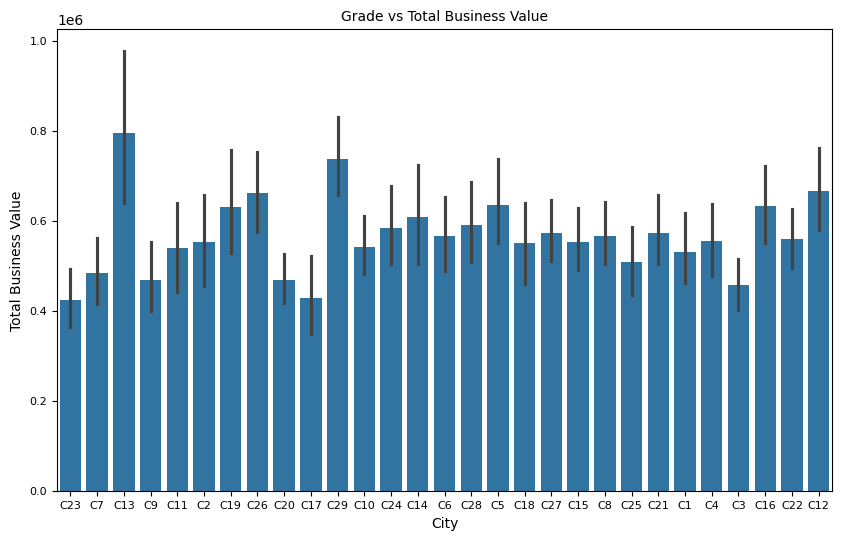

In [ ]:
plt.figure(figsize=(10, 6))
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Grade vs Total Business Value",fontsize = 10)
sns.barplot(data = df, x = 'City', y = 'Total Business Value')
plt.show()

In [ ]:
df.head(2)

MMM-YY  Driver_ID   Age  Gender City  Education_Level  Income  \
0 2019-01-01          1  28.0     0.0  C23                2   57387   
1 2019-02-01          1  28.0     0.0  C23                2   57387   

  Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0    2018-12-24             NaT                    1      1   
1    2018-12-24             NaT                    1      1   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2

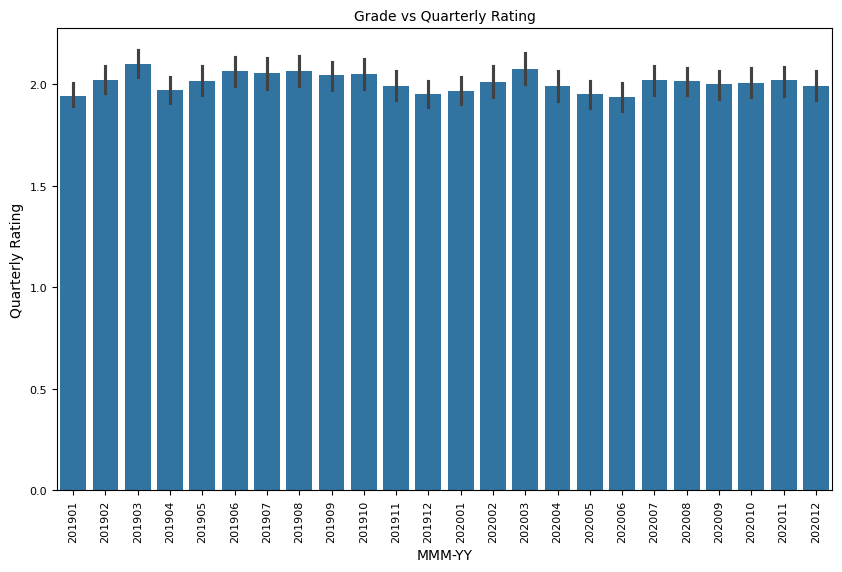

In [ ]:
# Seasonality
plt.figure(figsize=(10, 6))
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8, rotation = 90)
plt.title("Grade vs Quarterly Rating",fontsize = 10)
sns.barplot(data = df, x = df['MMM-YY'].map(lambda x: 100*x.year + x.month), y = 'Quarterly Rating')
plt.show()

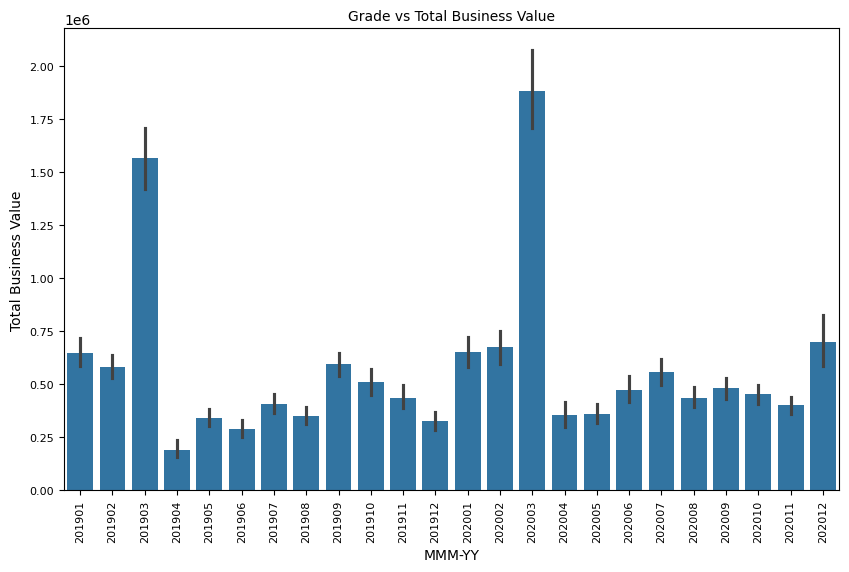

In [ ]:
# Seasonality
plt.figure(figsize=(10, 6))
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8, rotation = 90)
plt.title("Grade vs Total Business Value",fontsize = 10)
sns.barplot(data = df, x = df['MMM-YY'].map(lambda x: 100*x.year + x.month), y = 'Total Business Value')
plt.show()

**Comments:**
- Among drivers with improved quarterly rating from joining till now, most have stayed back and few have left and among drivers that don't have improvement in rating, most have left the company and few have stayed. --> ***Implies that if quarterly rating is not improved for a driver, it must be affecting their morale and thus resulting in them looking for other opportunities and leaving the company.***
- Comparing Rating1 with Rating - ***If their last quarter rating has not improved compared to 1st rating then driver is likely to leave, more so if their rating has reduced from a higher one.***
- Attrition is high for drivers with lower grades, compared to drivers with higher grades. --> ***Identify the reason for drivers getting lower grades, and equip them with means so they can improve their grades.***
- There is not much difference in attrition distribution for drivers with different joining designation. --> ***Implies irrespective of a drivers joining designation, their performance or experience at the company is resulting in attrition.***
- For drivers with high Income and Average Business Value, Attrition appears to be low, and attrition is high among drivers with average to low income and low business value created. --> ***Drivers with low business value creation may not be the most profitable for the company but the positive value creation ones are essential, hence further analysis is required to understand which ones of these should be retained and what's causing the low business value creation. Based on this analysis, necessary training, incentives can be given to enable them to perform better to create more business value which will help them earn more income as well.***
- Attrition is generally high for drivers with shorter tenure at RideSharingCo and among drivers of ages between 28 to 34 years --> ***Based on further analysis, identify if they are likely finding better opportunities in competeitor companies resulting in attrition and provide incentives to retain them.***
- Attrition is high in cities C20, C15, C26, and so on. --> ***Further analysis to be done to help identify if there are alternative and better opportunities in these cities resulting in attrition and how RideSharingCo as a company can build a mote to increase their competitive advantage in these cities.***

# ***4. Results Evaluation***

**4. Results Evaluation (10 Points)**
- ROC AUC Curve & comments
- Classification Report (Confusion Matrix etc)

***Models Trained with best parameters:***

- Decision Tree: tree_clf
- Random Forest: rfc
- GBDT: gbc
- XGBoost: xgb

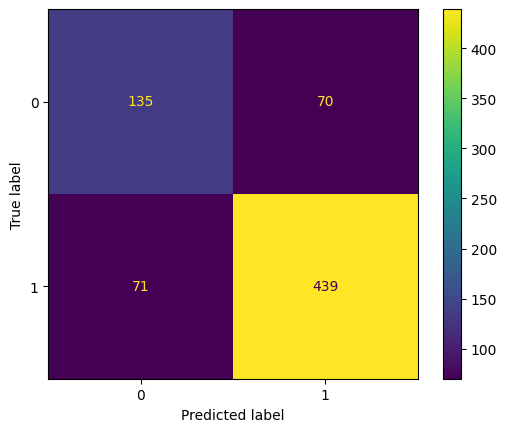

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = []

xgb.fit(X_train, y_train)
y_pred =xgb.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
#calculate true negatives, false positives, false negatives and true positives

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

models = [tree_clf, rfc, gbc, xgb]
y_pred = []

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test_scaled)

  cm = confusion_matrix(y_test,y_pred)
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]

  #calculate true positive rate and false positive rate
  tpr = tp/(tp+fn)
  fpr = fp/(fp+tn)
  tnr = tn/(tn+fp)
  fnr = fn/(fn+tp)

  print(f"Metrics for {model}:\n")
  print(f"True Positive Rate: {round(tpr*100,3)}%\n")
  print(f"False Positive Rate: {round(fpr*100,3)}%\n")
  print(f"True Negative Rate: {round(tnr*100,3)}%\n")
  print(f"False Negative Rate: {round(fnr*100,3)}%\n")
  print("------------------------------------------")

Metrics for DecisionTreeClassifier(max_depth=5, random_state=10):

True Positive Rate: 86.471%

False Positive Rate: 41.463%

True Negative Rate: 58.537%

False Negative Rate: 13.529%

------------------------------------------


<ipython-input-347-561f405b8c44>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Metrics for RandomForestClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=12,
                       max_features=11, max_leaf_nodes=32, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=170):

True Positive Rate: 84.706%

False Positive Rate: 29.268%

True Negative Rate: 70.732%

False Negative Rate: 15.294%

------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metrics for GradientBoostingClassifier(random_state=10):

True Positive Rate: 88.235%

False Positive Rate: 29.756%

True Negative Rate: 70.244%

False Negative Rate: 11.765%

------------------------------------------
Metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...):

True Positi

**Comments:**

Metrics for DecisionTreeClassifier:
- True Positive Rate: 86.471%
- False Positive Rate: 41.463%
- True Negative Rate: 58.537%
- False Negative Rate: 13.529%

------------------------------------------
Metrics for RandomForestClassifier:
- True Positive Rate: 85.49%
- False Positive Rate: 29.756%
- True Negative Rate: 70.244%
- False Negative Rate: 14.51%

------------------------------------------
Metrics for GradientBoostingClassifier:
- True Positive Rate: 88.235%
- False Positive Rate: 29.756%
- True Negative Rate: 70.244%
- False Negative Rate: 11.765%

------------------------------------------
Metrics for XGBClassifier:
- True Positive Rate: 86.078%
- False Positive Rate: 34.146%
- True Negative Rate: 65.854%
- False Negative Rate: 13.922%

------------------------------------------
- TPR, TNR (Higher the better) and FPR, FNR (Lower the better)
- TPR is around 86-90% for all models, TNR is around 58-66%
- FNR is around 9-13% for all models, FPR is around 33-41%
- ***Given the business model of RideSharingCo, predicting True Positive Rate is important in order to be correctly able to predict the drivers that would potentially leave RideSharingCo. Since this rate is around 90% for all models, models are performing well but there is scope of improvement to increase TNR and reduce FPR.***

In [ ]:
# Printing Classification Report for all tuned models - Precision Recall F1 score
from sklearn.metrics import classification_report

models = [tree_clf, rfc, gbc, xgb]

for model in models:
  y_pred = model.predict(X_test_scaled)
  print(f"Classification report for {model}:\n")
  print(classification_report(y_test, y_pred))
  print("------------------------------------------")


Classification report for DecisionTreeClassifier(max_depth=5, random_state=10):

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       205
           1       0.84      0.86      0.85       510

    accuracy                           0.78       715
   macro avg       0.74      0.73      0.73       715
weighted avg       0.78      0.78      0.78       715

------------------------------------------
Classification report for RandomForestClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=12,
                       max_features=11, max_leaf_nodes=32, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=170):

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       205
           1       0.88      0.85      0.86       510

    accuracy                           0.81       715
   macro avg       0.76      0.78      0.77       715
weighted avg       0.81      0.81

**Comments:**

DecisionTreeClassifier
- Accuracy: 78%
- Precision: 84%
- Recall: 86%
- F1 score: 85%

------------------------------------------
RandomForestClassifier
- Accuracy: 81%
- Precision: 88%
- Recall: 85%
- F1 score: 87%

------------------------------------------
GradientBoostingClassifier
- Accuracy: 83%
- Precision: 88%
- Recall: 88%
- F1 score: 88%

------------------------------------------
XGBClassifier
- Accuracy: 80%
- Precision: 86%
- Recall: 86%
- F1 score: 86%
------------------------------------------
- ***Considering the business function of RideSharingCo, Precision would be an important metric and it appears to be around 85-86% on an average for all models.***
- ***F1 score is also about 87-88% for all models.***




AUC for Precision, Recall DecisionTreeClassifier(max_depth=5, random_state=10) : 90.3923%
AUC for Precision, Recall RandomForestClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=12,
                       max_features=11, max_leaf_nodes=32, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=170) : 92.9337%
AUC for Precision, Recall GradientBoostingClassifier(random_state=10) : 93.7594%
AUC for Precision, Recall XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None

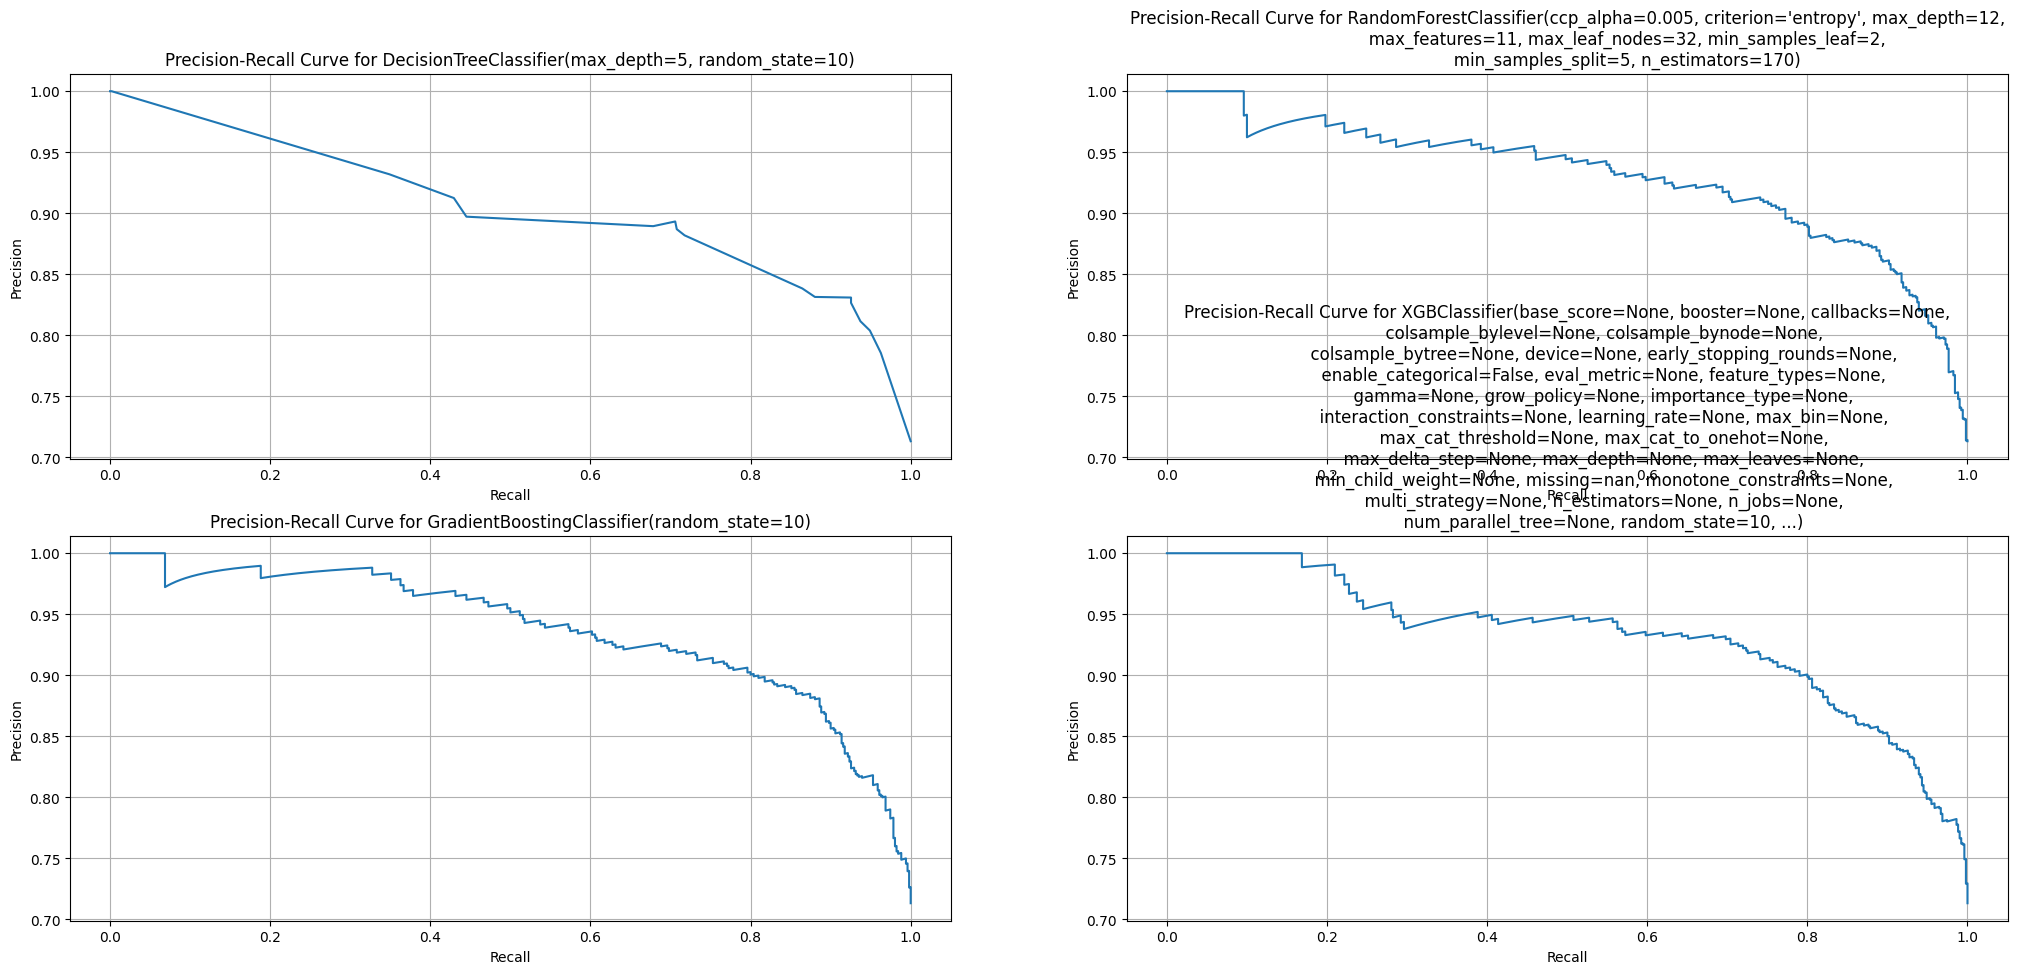

In [ ]:
# Plotting Precision Recall Curve for all models
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

models = [tree_clf, rfc, gbc, xgb]
plt.figure(figsize = (25,11))

for i in range(len(models)):
  plt.subplot(2,2,i+1)
  precision, recall, thr = precision_recall_curve(y_test, models[i].predict_proba(X_test_scaled)[:,1])
  print(f"AUC for Precision, Recall {models[i]} : {round(auc(recall, precision)*100,4)}%")
  plt.plot(recall, precision)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(f'Precision-Recall Curve for {models[i]}')
  plt.grid(True)

plt.show()

AUC for Precision, Recall for DecisionTreeClassifier : 90.3923%
AUC for Precision, Recall for RandomForestClassifier : 92.9337%
AUC for Precision, Recall for GradientBoostingClassifier : 93.7594%
AUC for Precision, Recall for XGBClassifier : 93.1511%


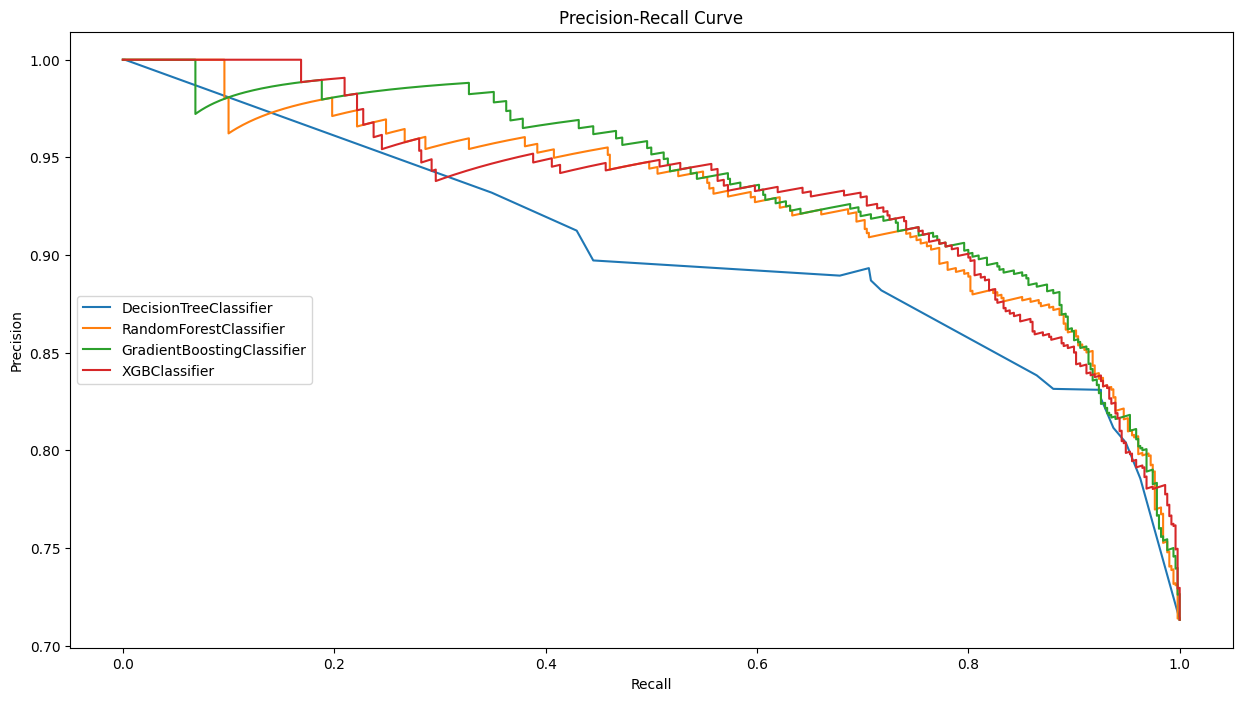

In [ ]:
# Plotting Precision Recall Curve for all models
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

models = [tree_clf, rfc, gbc, xgb]
fig, ax = plt.subplots(figsize=(15,8))

#Plot for DecisionTreeClassifier
precision_tree_clf, recall_tree_clf, thr = precision_recall_curve(y_test, tree_clf.predict_proba(X_test_scaled)[:,1])
print(f"AUC for Precision, Recall for DecisionTreeClassifier : {round(auc(recall_tree_clf, precision_tree_clf)*100,4)}%")
ax.plot(recall_tree_clf, precision_tree_clf, label = 'DecisionTreeClassifier')

#Plot for RandomForestClassifier
precision_rfc, recall_rfc, thr = precision_recall_curve(y_test, rfc.predict_proba(X_test_scaled)[:,1])
print(f"AUC for Precision, Recall for RandomForestClassifier : {round(auc(recall_rfc, precision_rfc)*100,4)}%")
ax.plot(recall_rfc, precision_rfc, label = 'RandomForestClassifier')

#Plot for GradientBoostingClassifier
precision_gbc, recall_gbc, thr = precision_recall_curve(y_test, gbc.predict_proba(X_test_scaled)[:,1])
print(f"AUC for Precision, Recall for GradientBoostingClassifier : {round(auc(recall_gbc, precision_gbc)*100,4)}%")
ax.plot(recall_gbc, precision_gbc, label = 'GradientBoostingClassifier')

#Plot for XGBClassifier
precision_xgb, recall_xgb, thr = precision_recall_curve(y_test, xgb.predict_proba(X_test_scaled)[:,1])
print(f"AUC for Precision, Recall for XGBClassifier : {round(auc(recall_xgb, precision_xgb)*100,4)}%")
ax.plot(recall_xgb, precision_xgb, label = 'XGBClassifier')

#Plot for Baseline
#baseline = len(y_test[y_test==1]) / len(y_test)
#ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title(f'Precision-Recall Curve')
ax.legend(loc='center left');

plt.show()

**Comments:**
- AUC for Precision, Recall for DecisionTreeClassifier : 90.3923%
- AUC for Precision, Recall for RandomForestClassifier : 92.9337%
- AUC for Precision, Recall for GradientBoostingClassifier : 93.7594%
- AUC for Precision, Recall for XGBClassifier : 93.1511%
----------------------------------------------------------------
- ***These Precision Recall curves give the shape we would expect (Except Decision Tree Classifier) — at thresholds with low recall, the precision is correspondingly high, and at very high recall, the precision begins to drop.***
- ***Gradient Boosting Classifier appears to be performing the best as compared to other Classifiers, with highest AUC for Precision Recall curve of 93.7594%.***

AUC for ROC for DecisionTreeClassifier(max_depth=5, random_state=10): 80.5605%
AUC for ROC for RandomForestClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=12,
                       max_features=11, max_leaf_nodes=32, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=170): 85.7083%
AUC for ROC for GradientBoostingClassifier(random_state=10): 86.7461%
AUC for ROC for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, miss

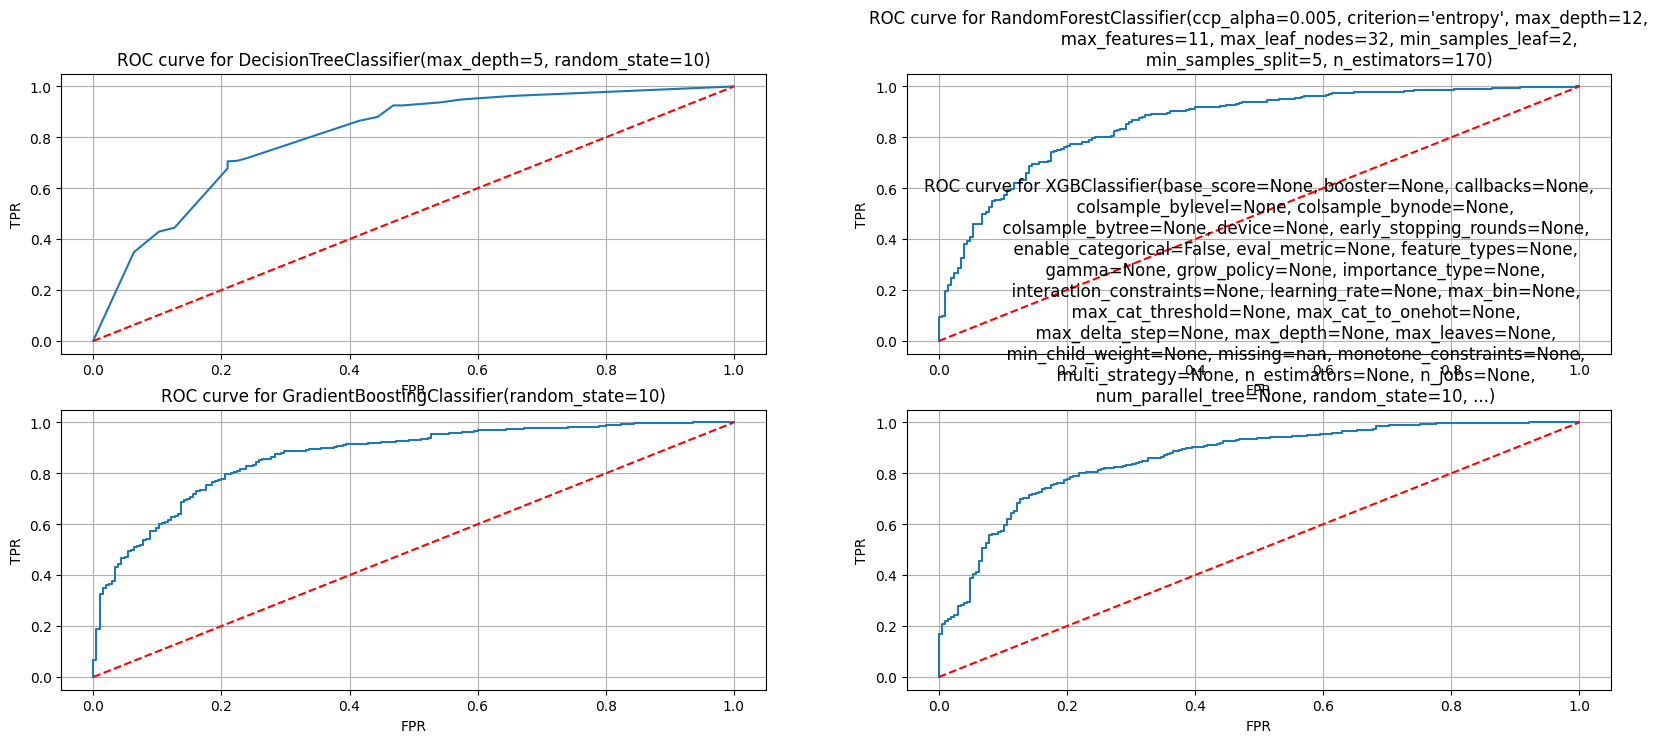

In [ ]:
# Plotting ROC Curve for all models
from sklearn.metrics import roc_curve, roc_auc_score

models = [tree_clf, rfc, gbc, xgb]
plt.figure(figsize = (20,8))

for i in range(len(models)):
  plt.subplot(2,2,i+1)
  probability = models[i].predict_proba(X_test_scaled)
  probabilites = probability[:,1]
  fpr, tpr, thr = roc_curve(y_test,probabilites)

  plt.plot(fpr,tpr)
  #random model
  plt.plot(fpr,fpr,'--',color='red')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title(f'ROC curve for {models[i]}')
  plt.grid(True)
  print(f"AUC for ROC for {models[i]}: {round(roc_auc_score(y_test,probabilites)*100,4)}%")

plt.show()

**Comments:**
- AUC for ROC for DecisionTreeClassifier: 80.5605%
- AUC for ROC for RandomForestClassifier: 85.7083%
- AUC for ROC for GradientBoostingClassifier): 86.7461%
- AUC for ROC for XGBClassifier: 85.8508%
-------------------------------------------------------
- ***AUC for ROC curve is the highest for Gradient Boosting Classifier, thus even AUC-ROC curve confirming that Gradient Boosting Algorithm has outperformed others in predicting Attrition of drivers at RideSharingCo.***

# ***5. Actionable Insights & Recommendations***

## ***Actionable Insights***

### ***Data Summary:***


- (Rows,Columns) of DataFrame:  (19104, 14)

***Since there are very few samples present in the dataset, data will be divided into training and testing data and K fold cross validation will be used for hyper-parameter tuning.***
- Unnamed column to be dropped
- MMM-YY, Dateofjoining, LastWorkingDate columns to be converted to datetime format
***Missing Values:**
>- Gender, Age to be converted from float to int
>- 61 Age, 52 Gender have few missing values.
>- 17488 LWD has many NULL values but NULL values in LWD implies that driver is still a part of RideSharingCo.
***Feature Engineering:**
>- **Feature1:** Target variable is not present hence new feature can be created based on LWD. If LWD is NULL, driver is a part of RideSharingCo otherwise driver has left RideSharingCo.
>- **Feature2:** New feature can be created to identify the tenure of a driver at RideSharingCo.

- (Min,Max) for MMM-YY: (Timestamp('2019-01-01 00:00:00'), Timestamp('2020-12-01 00:00:00'))
- (Min,Max) for Dateofjoining: (Timestamp('2013-04-01 00:00:00'), Timestamp('2020-12-28 00:00:00'))
- (Min,Max) for LastWorkingDate: (Timestamp('2018-12-31 00:00:00'), Timestamp('2020-12-28 00:00:00'))
- (Min,Max) for Driver_ID: (1, 2788)
- (Min,Max) for Age: (21.0, 58.0)
- (Min,Max) for Income: (10747, 188418)
- (Min,Max) for Total Business Value: (-6000000, 33747720)
- There are records for 11074 Male and 7978 Female drivers

<br>

- **Data is recorded from 1st Jan 2019 to 28th Dec 2020**
- **There are 2381 drivers**
- **58% details are present for Male drivers**
- **When Grouping by DriverID:**
>- Club MMM-YY & Quaterly Rating to identify if Quarterly Rating has increased or decreased
>- Average/Sum total Business Value created.
>- Age - Take last value
>- All other features have same value for every reporting date. - Take last value

- Most drivers (152) are from City C20, followed by (101) from C15, (96) from C29, (93) from C26
- Grade,Income and Grade,Joining Designation have positive correlation
- Average Business Value, Improved Quarterly Rating have positive correlation
- Joining Designation,Income and Imprived Quaterly Rating, Rating 1 have positive correlation closer to 0
- Improved Quarterly Rating,Joining Designation have close to 0 but negative correlation.
- Income and Grade are positively correlated
- Higher the joining designation, higher the grade
- Average business value by drivers with Improved_Quarterly_Rating and rating1 is high
- Higher the Income, higher business value created by drivers.
- Higher average business value is created by drivers with education level 1
- More the age and income higher average business value created by drivers.


### ***Insights:***

>* ***More age, high Income > Higher Business Value***
------------------------------------------------
**Outliers:**
- Age has a few outliers but that can be ignored as Age is not a major contributer to Attrition.
- Joining Designation has very few outliers - ones with Joining Designation as 4 and 5 but it can be ignored since this is also not a prominent feature.
- After removal of Outliers for Income and Total Business Value, models were showing worse performance hence values have been left out.
- Outliers for Tenure is left as we have limited data hence removing more data would reduce our training set.
------------------------------------------------
**Insights:**

- Quarterly ratings are between 1 to 4, hence no driver has received a rating of 5.
- Correlation between Age and Quarterly Rating is 0.17 i.e. they are slightly positively correlated, implies if age increases by one year, quarterly rating would increase by 0.17.
------------------------------------------------
- City C26 showed the most improvement in Quarterly Rating over
the past year 2020.
- ***Driver's performance could be affected by the City they operate in depending on demographis preferences, infrastructure, competitions in the City, etc.***
------------------------------------------------
- From RideSharingCo's perspective, ROC AUC and Precision should be the primary focus for driver retention.
- Precision is the ability to get the highest ratio of driver attrition being predicted correctly - Low precision implies your model is not able to generalize well to predict which driver is likely to leave.
- Recall is the ability to correctly predict driver attrition out of drivers who actually left the company - Low recall implies, end up with higher oppotunity cost by not being able to retain good drivers.
------------------------------------------------
- Drivers with a Grade of A i.e. 5 are more likely to have a higher Total Business Value.
- ***Drivers ratings appear to be similar in all months of both years however, Total Business Value Creation is relatively high in the month of March every year hence there is a seasonality factor observed for Total Business Value.***
------------------------------------------------
- Tenure, City, Joining Designation have an impact on a driver's Quarterly Rating.
- If a driver's Quarterly Rating drops significantly, Total Business Value in the subsequent period also drops.
------------------------------------------------
- Among drivers with improved quarterly rating from joining till now, most have stayed back and few have left and among drivers that don't have improvement in rating, most have left the company and few have stayed. --> ***Implies that if quarterly rating is not improved for a driver, it must be affecting their morale and thus resulting in them looking for other opportunities and leaving the company.***
- Comparing Rating1 with Rating - ***If their last quarter rating has not improved compared to 1st rating then driver is likely to leave, more so if their rating has reduced from a higher one.***
- Attrition is high for drivers with lower grades, compared to drivers with higher grades. --> ***Identify the reason for drivers getting lower grades, and equip them with means so they can improve their grades.***
- There is not much difference in attrition distribution for drivers with different joining designation. --> ***Implies irrespective of a drivers joining designation, their performance or experience at the company is resulting in attrition.***
- For drivers with high Income and Average Business Value, Attrition appears to be low, and attrition is high among drivers with average to low income and low business value created. --> ***Drivers with low business value creation may not be the most profitable for the company but the positive value creation ones are essential, hence further analysis is required to understand which ones of these should be retained and what's causing the low business value creation. Based on this analysis, necessary training, incentives can be given to enable them to perform better to create more business value which will help them earn more income as well.***
- Attrition is generally high for drivers with shorter tenure at RideSharingCo and among drivers of ages between 28 to 34 years --> ***Based on further analysis, identify if they are likely finding better opportunities in competeitor companies resulting in attrition and provide incentives to retain them.***
- Attrition is high in cities C20, C15, C26, and so on. --> ***Further analysis to be done to help identify if there are alternative and better opportunities in these cities resulting in attrition and how RideSharingCo as a company can build a mote to increase their competitive advantage in these cities.***

### ***Model Performance Summary:***

***Decision Tree Algorithm Performance***
- Accuracy: 78%
- Precision: 84%
- Recall: 86%
- F1 score: 85%

***Random Forest Algorithm Performance***
- Accuracy: 81%
- Precision: 88%
- Recall: 85%
- F1 score: 86%

***Gradient Boosting Algorithm Performance***
- Accuracy: 80%
- Precision: 86%
- Recall: 85%
- F1 score: 86%

***XGBoost Algorithm Performance***
- Accuracy: 82%
- Precision: 87%
- Recall: 88%
- F1 score: 87%

- Stacking Model Accuracy: 0.8111888111888111
- Voting Model Accuracy: 0.8293706293706293
-**Voting ensemble is more accurate.**

- Important features
>- Improved_Quarterly_Rating1
>- Grade
>- Average Business Value
>- Tenure
>- Joining Designation
>- Income
>- Gender
>- Improved_Quarterly_Rating

------------------------------------------
- TPR, TNR (Higher the better) and FPR, FNR (Lower the better)
- TPR is around 86-90% for all models, TNR is around 58-66%
- FNR is around 9-13% for all models, FPR is around 33-41%
- ***Given the business model of RideSharingCo, predicting True Positive Rate is important in order to be correctly able to predict the drivers that would potentially leave RideSharingCo. Since this rate is around 90% for all models, models are performing well but there is scope of improvement to increase TNR and reduce FPR.***
------------------------------------------
- AUC for Precision, Recall for DecisionTreeClassifier : 90.3923%
- AUC for Precision, Recall for RandomForestClassifier : 92.9337%
- AUC for Precision, Recall for GradientBoostingClassifier : 93.7594%
- AUC for Precision, Recall for XGBClassifier : 93.1511%
----------------------------------------------------------------
- ***These Precision Recall curves give the shape we would expect (Except Decision Tree Classifier) — at thresholds with low recall, the precision is correspondingly high, and at very high recall, the precision begins to drop.***
- ***Gradient Boosting Classifier appears to be performing the best as compared to other Classifiers, with highest AUC for Precision Recall curve of 93.7594%.***
- ***Considering the business function of RideSharingCo, Precision would be an important metric and it appears to be around 85-86% on an average for all models.***
- ***F1 score is also about 87-88% for all models.***
----------------------------------------------------------------
- AUC for ROC for DecisionTreeClassifier: 80.5605%
- AUC for ROC for RandomForestClassifier: 85.7083%
- AUC for ROC for GradientBoostingClassifier): 86.7461%
- AUC for ROC for XGBClassifier: 85.8508%
-------------------------------------------------------
- ***AUC for ROC curve is the highest for Gradient Boosting Classifier, thus even AUC-ROC curve confirming that Gradient Boosting Algorithm has outperformed others in predicting Attrition of drivers at RideSharingCo.***


## ***Recommendations***

### ***Recommendations:***

**Driver Ratings:**
- Comparing Rating1 with Rating - ***If their last quarter rating has not improved compared to 1st rating then driver is likely to leave, more so if their rating has reduced from a higher one.***
- Among drivers with improved quarterly rating from joining till now, most have stayed back and few have left and among drivers that don't have improvement in rating, most have left the company and few have stayed. --> ***Implies that if quarterly rating is not improved for a driver, it must be affecting their morale and thus resulting in them looking for other opportunities and leaving the company. Perform targeted training programs to enable the drivers (with low or same quarterly rating) to improve their rating.***

**Seasonality:**
- Total Business Value Creation is relatively high in the month of March every year hence there is a seasonality factor observed for Total Business Value --> ***Further analysis to be done to identify and confirm the cause of seasonality so the situation can be leveraged to increae profitability for RideSharingCo.***
- For drivers with high Income and Average Business Value, Attrition appears to be low, and attrition is high among drivers with average to low income and low business value created. --> ***Drivers with low business value creation may not be the most profitable for the company but the positive low value creation ones are essential, hence further analysis is required to understand which ones of these should be retained and what's causing the low business value creation. Based on this analysis, necessary training, incentives can be given to enable them to perform better to create more business value which will help them earn more income as well. Work on improvising the recruitment process and have a quarterly evaluation of drivers done based on their performance and business value creation.***

**Joining Designation, Grades:**
- Attrition is high for drivers with lower grades, compared to drivers with higher grades. --> ***Identify the reason for drivers getting lower grades, and equip them with means so they can improve their grades by performing targeted training programs for existing drivers.***
- There is not much difference in attrition distribution for drivers with different joining designation. --> ***Implies irrespective of a drivers joining designation, their performance or experience at the company is resulting in attrition.***

**Age, City:**
- Attrition is generally high for drivers with shorter tenure at RideSharingCo and among drivers of ages between 28 to 34 years --> ***Based on further analysis, identify if young drives (28-34) are likely finding better opportunities in competeitor companies resulting in attrition and provide incentives to retain them. This could be due to this age group having a shift of perspective in terms of work hence looking for better opportunities at early stages of their career.***
- Attrition is high in cities C20, C15, C26, and so on. --> ***Driver's performance could be affected by the City they operate in depending on demographis preferences, infrastructure, competitions in the City, etc.***
- ***Further analysis to be done to help identify if there are alternative and better opportunities in these cities resulting in attrition and how RideSharingCo as a company can build a moat around their business to increase their competitive advantage in these cities.***

**Metrics:**
- Given the business model of RideSharingCo, predicting True Positive Rate is important in order to be correctly able to predict the drivers that would potentially leave RideSharingCo. ---> ***Since TPR rate is around 90% for all models, models are performing well but there is scope of improvement to increase TNR and reduce FPR.***
- ***Gradient Boosting Classifier appears to be outperforming other Classifiers in predicting Attrition of drivers at RideSharingCo - with highest AUC of 93.7594% for Precision Recall curve and AUC of 86.7461% for ROC curve.***
- Considering the business function of RideSharingCo, Precision would be an important metric and it appears to be around 85-86% on an average for all models.
F1 score is also about 87-88% for all models.
- Stacking Model Accuracy: 81.12% and Voting Model Accuracy: 82.94% thus ---> **Voting ensemble is more accurate than Stacking Model hence use such Ensemble methods to aggregate performance of additional classification models like Logistic Regression,  KNN (with LSH), Light GBM to improve models prediction and generalising ability.**

### ***Feedback Loop:***

- Perform periodic review of recruitment process and drivers to identify drivers consistently creating negative value to the business so steps can be taken accordingly.
- Obtain feedback from drivers and customers about their expierence, to address concerns and identify areas of improvement within the company.
- Perform research and surveys to collect data on new trends in the market, in different cities, customer and drivers requirements and preferences, regulatory implications, tax implications, etc.
- Perform periodic review process to assess model's relevance and performance by identifying if any changes are required to the model based on changes in the data, regulatory implications, regime shift, new trends, etc. so the model can be refined accordingly.
- Identify if any training or incentive program needs to be updated based on model changes.